# Naive Bayes Salary Dataset

## Problem Statement

Prepare a classification model using Naive Bayes 
for salary data 

Data Description:

age -- age of a person

workclass	-- A work class is a grouping of work 

education	-- Education of an individuals	

maritalstatus -- Marital status of an individulas	

occupation	 -- occupation of an individuals

relationship -- 	

race --  Race of an Individual

sex --  Gender of an Individual

capitalgain --  profit received from the sale of an investment	

capitalloss	-- A decrease in the value of a capital asset

hoursperweek -- number of hours work per week	

native -- Native of an individual

Salary -- salary of an individual


In [242]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline
import scipy.stats as stat

In [3]:
train_data = pd.read_csv('SalaryData_Train.csv')

In [4]:
train_data.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
train_data.shape

(30161, 14)

In [6]:
#importing testing data
test_data = pd.read_csv('SalaryData_Test.csv')
test_data.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [8]:
test_data.shape

(15060, 14)

In [25]:
#merging train and test data for analysis purpose

raw_data = pd.concat([train_data, test_data], ignore_index = True)
raw_data

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45216,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
45217,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
45218,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
45219,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


# Data Exploration

In [26]:
raw_data.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,45221.000000,45221.000000,45221.000000,45221.000000,45221.000000
mean,38.548086,10.118463,1101.454700,88.548617,40.938038
std,13.217981,2.552909,7506.511295,404.838249,12.007640
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [27]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45221 entries, 0 to 45220
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            45221 non-null  int64 
 1   workclass      45221 non-null  object
 2   education      45221 non-null  object
 3   educationno    45221 non-null  int64 
 4   maritalstatus  45221 non-null  object
 5   occupation     45221 non-null  object
 6   relationship   45221 non-null  object
 7   race           45221 non-null  object
 8   sex            45221 non-null  object
 9   capitalgain    45221 non-null  int64 
 10  capitalloss    45221 non-null  int64 
 11  hoursperweek   45221 non-null  int64 
 12  native         45221 non-null  object
 13  Salary         45221 non-null  object
dtypes: int64(5), object(9)
memory usage: 4.8+ MB


In [28]:
raw_data.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [29]:
raw_data[raw_data.duplicated()]

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
326,33,Private,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
364,27,Private,Bachelors,13,Never-married,Craft-repair,Not-in-family,White,Male,0,0,50,United-States,<=50K
518,24,Private,HS-grad,9,Never-married,Handlers-cleaners,Unmarried,Black,Female,0,0,40,United-States,<=50K
525,24,Private,HS-grad,9,Never-married,Craft-repair,Own-child,White,Male,0,0,40,United-States,<=50K
619,33,Private,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45205,22,Private,Some-college,10,Never-married,Craft-repair,Own-child,White,Male,0,0,40,United-States,<=50K
45210,32,Private,HS-grad,9,Married-civ-spouse,Handlers-cleaners,Husband,White,Male,0,0,40,United-States,<=50K
45213,31,Private,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
45214,25,Private,HS-grad,9,Never-married,Other-service,Own-child,White,Female,0,0,40,United-States,<=50K


In [30]:
raw_data[raw_data.duplicated()].shape

(5982, 14)

In [31]:
numerical_features = raw_data.select_dtypes(include = ['int64','float64','int32','float32']).columns.tolist()

In [32]:
print('Numerical features are: ', numerical_features)

Numerical features are:  ['age', 'educationno', 'capitalgain', 'capitalloss', 'hoursperweek']


In [33]:
raw_data[numerical_features]

,age,educationno,capitalgain,capitalloss,hoursperweek
0,39,13,2174,0,40
1,50,13,0,0,13
2,38,9,0,0,40
3,53,7,0,0,40
4,28,13,0,0,40
...,...,...,...,...,...
45216,33,13,0,0,40
45217,39,13,0,0,36
45218,38,13,0,0,50
45219,44,13,5455,0,40


In [35]:
discrete_feature = [feature for feature in numerical_features if len(raw_data[feature].unique())<25]
print('Discrete variables count: {}'.format(len(discrete_feature)))

Discrete variables count: 1


In [36]:
continous_feature = [feature for feature in numerical_features if feature not in discrete_feature]
print('Continous feature count {}'.format(len(continous_feature)))

Continous feature count 4


In [37]:
categorical = [feature for feature in raw_data.columns if feature not in numerical_features]
print('The categorical variables are: ', categorical)

The categorical variables are:  ['workclass', 'education', 'maritalstatus', 'occupation', 'relationship', 'race', 'sex', 'native', 'Salary']


In [38]:
for var in categorical:
    print(raw_data[var].value_counts())

workclass
 Private             33306
 Self-emp-not-inc     3796
 Local-gov            3100
 State-gov            1946
 Self-emp-inc         1646
 Federal-gov          1406
 Without-pay            21
Name: count, dtype: int64
education
 HS-grad         14783
 Some-college     9898
 Bachelors        7570
 Masters          2514
 Assoc-voc        1959
 11th             1619
 Assoc-acdm       1507
 10th             1223
 7th-8th           823
 Prof-school       785
 9th               676
 12th              577
 Doctorate         544
 5th-6th           449
 1st-4th           222
 Preschool          72
Name: count, dtype: int64
maritalstatus
 Married-civ-spouse       21055
 Never-married            14597
 Divorced                  6297
 Separated                 1411
 Widowed                   1277
 Married-spouse-absent      552
 Married-AF-spouse           32
Name: count, dtype: int64
occupation
 Craft-repair         6020
 Prof-specialty       6008
 Exec-managerial      5984
 Adm-clerical  

In [40]:
# frequency distribution

for var in categorical:

    print(raw_data[var].value_counts()/(len(raw_data)))

workclass
 Private             0.736516
 Self-emp-not-inc    0.083943
 Local-gov           0.068552
 State-gov           0.043033
 Self-emp-inc        0.036399
 Federal-gov         0.031092
 Without-pay         0.000464
Name: count, dtype: float64
education
 HS-grad         0.326906
 Some-college    0.218881
 Bachelors       0.167400
 Masters         0.055594
 Assoc-voc       0.043321
 11th            0.035802
 Assoc-acdm      0.033325
 10th            0.027045
 7th-8th         0.018200
 Prof-school     0.017359
 9th             0.014949
 12th            0.012760
 Doctorate       0.012030
 5th-6th         0.009929
 1st-4th         0.004909
 Preschool       0.001592
Name: count, dtype: float64
maritalstatus
 Married-civ-spouse       0.465602
 Never-married            0.322793
 Divorced                 0.139249
 Separated                0.031202
 Widowed                  0.028239
 Married-spouse-absent    0.012207
 Married-AF-spouse        0.000708
Name: count, dtype: float64
occupation


In [41]:
for var in categorical:
    print(var, 'contains', len(raw_data[var].unique()), 'labels')

workclass contains 7 labels
education contains 16 labels
maritalstatus contains 7 labels
occupation contains 14 labels
relationship contains 6 labels
race contains 5 labels
sex contains 2 labels
native contains 40 labels
Salary contains 2 labels


Here, native has the highest cardinality. And we know that cardinality can pose problem in machine learning algorithms. So, we would take special care of this component, specially during the train test split.

In [43]:
raw_data.corr(numeric_only = True)

,age,educationno,capitalgain,capitalloss,hoursperweek
age,1.000000,0.037623,0.079682,0.059426,0.101992
educationno,0.037623,1.000000,0.126907,0.081741,0.146206
capitalgain,0.079682,0.126907,1.000000,-0.032095,0.083880
capitalloss,0.059426,0.081741,-0.032095,1.000000,0.054220
hoursperweek,0.101992,0.146206,0.083880,0.054220,1.000000


# Exploratory Data Analysis

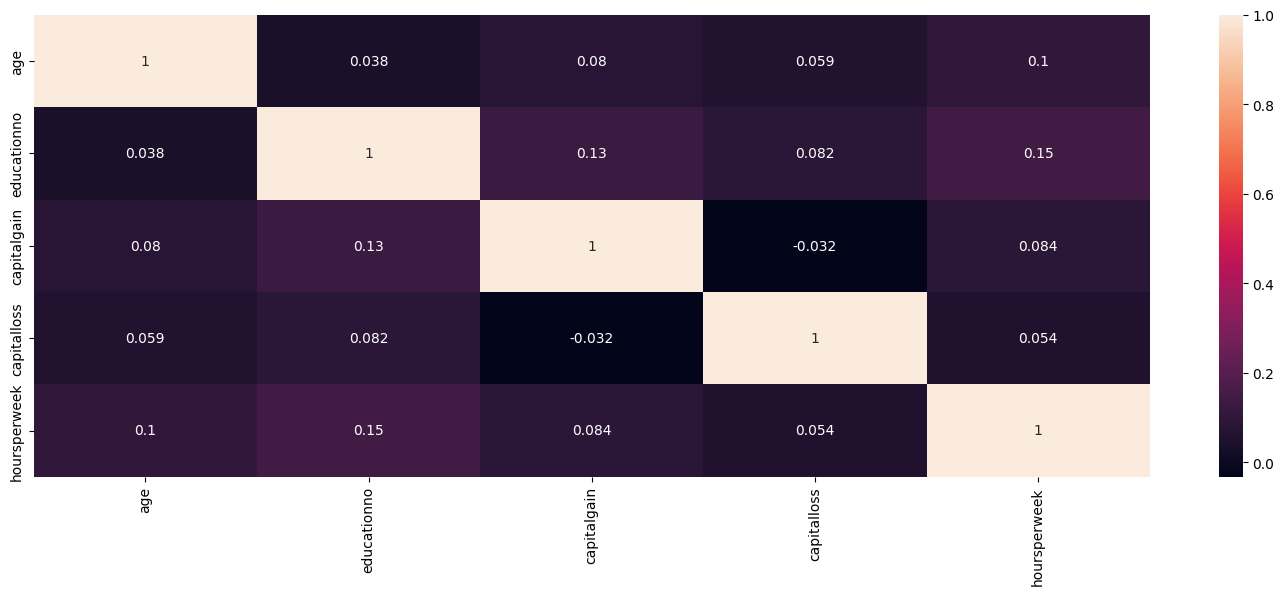

In [46]:
fig = plt.figure(figsize = (18,6))
sns.heatmap(raw_data[numerical_features].corr(), annot = True)
plt.xticks(rotation = 90)
plt.show()

So, here we can see that any of the numerical column is not the related to each other.

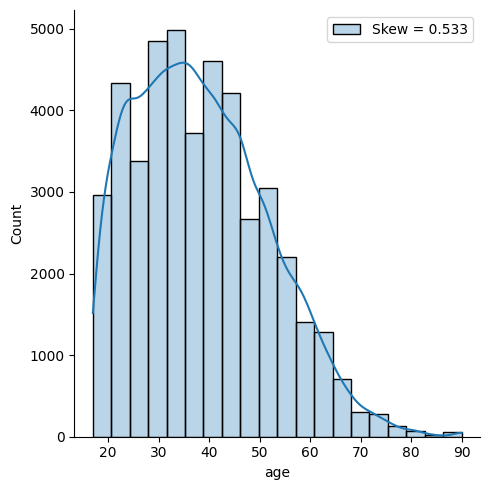

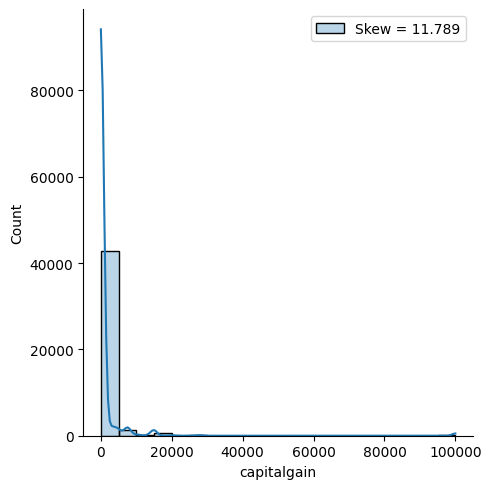

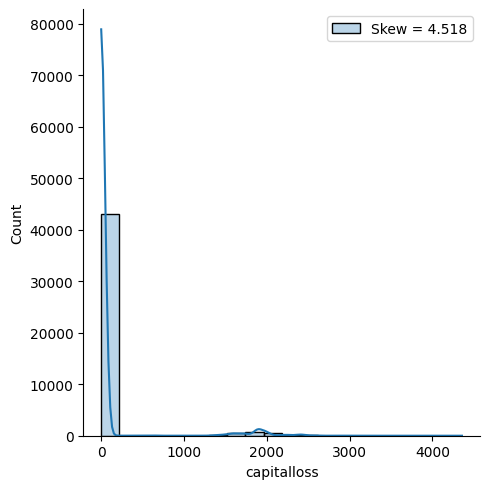

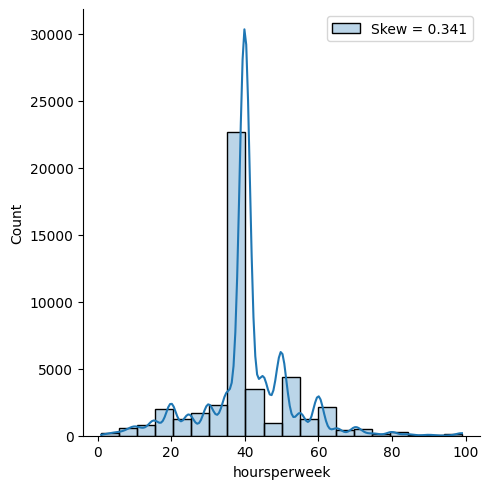

In [49]:
for var in continous_feature:
    skew = raw_data[var].skew()
    sns.displot(raw_data[var], kde = True, label = 'Skew = %.3f' %(skew), bins = 20, alpha = 0.3)
    plt.legend(loc = 'best')
    plt.show()

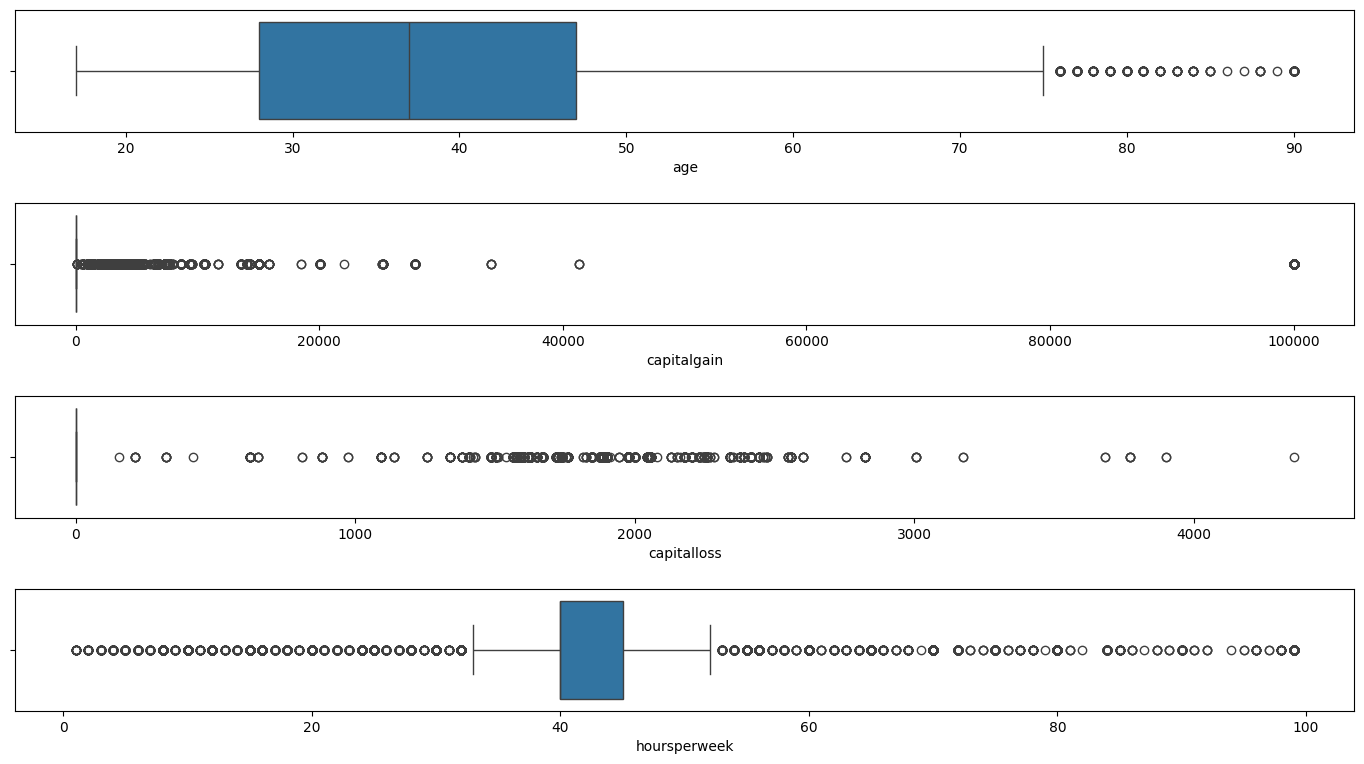

In [57]:
fig, axes = plt.subplots(4,1, figsize= (14,8), sharex = False, sharey = False)
i = 0
for var in continous_feature:
    sns.boxplot(x = var, data = raw_data, ax = axes[i])
    i += 1
plt.tight_layout(pad = 2.0)

__After log transformation__

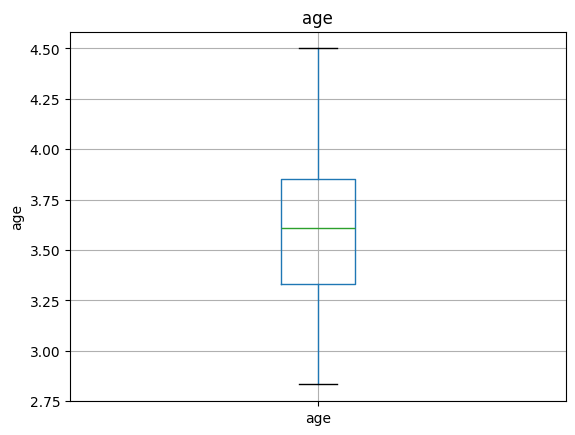

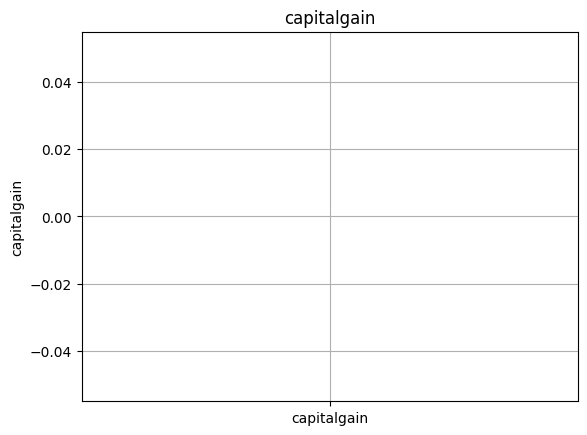

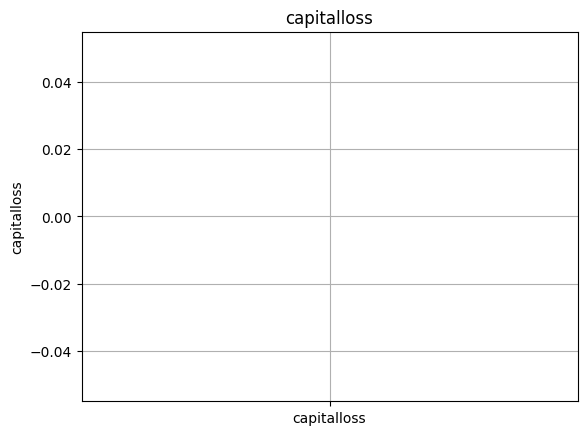

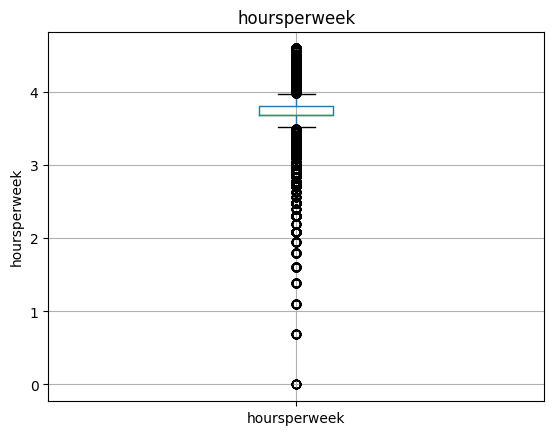

In [59]:
data = raw_data.copy()
for var in continous_feature:
    data[var] = np.log(data[var])
    data.boxplot(column = var)
    plt.ylabel(var)
    plt.title(var)
    plt.show()

## Visualize the distributionn of 'age' and 'hoursperweek'

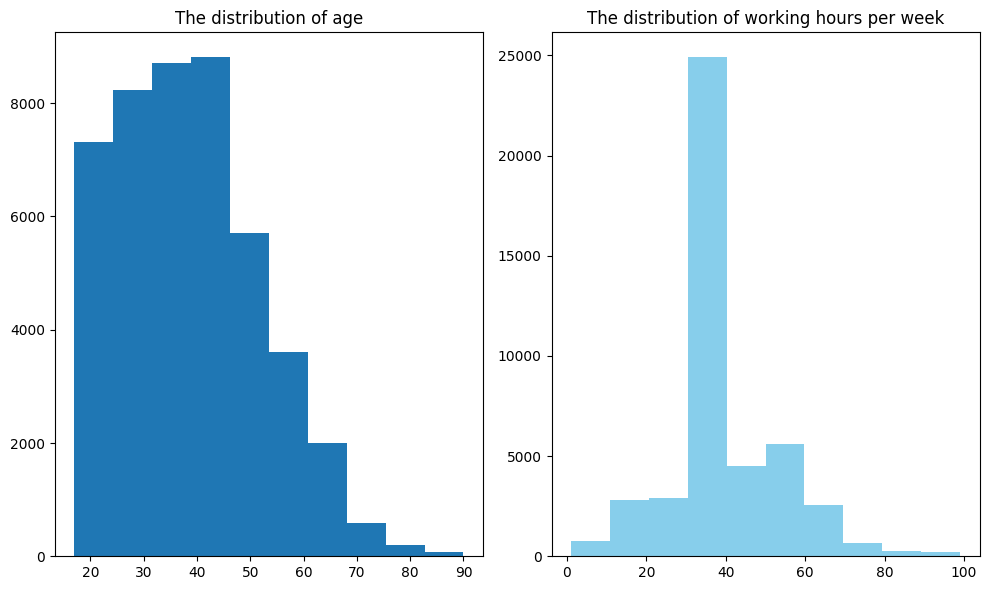

In [61]:
dist_age_balance = plt.figure(figsize = (10,6))

ra1 = dist_age_balance.add_subplot(1,2,1)
ra2 = dist_age_balance.add_subplot(1,2,2)

ra1.hist(raw_data['age'])
ra1.set_title('The distribution of age')

ra2.hist(raw_data['hoursperweek'], color = 'skyblue')
ra2.set_title('The distribution of working hours per week')

plt.tight_layout()
plt.show()

In [62]:
raw_data[['age','hoursperweek']].describe()

,age,hoursperweek
count,45221.000000,45221.000000
mean,38.548086,40.938038
std,13.217981,12.007640
min,17.000000,1.000000
25%,28.000000,40.000000
50%,37.000000,40.000000
75%,47.000000,45.000000
max,90.000000,99.000000


__Distribution of age:__ The age parameter varies from 17 to 90, but the majority of data lies between, 28 and 47 (that is, 25the and 75th percentile). The data is right skewed.

__Distribution of balance:__ The range is from 1 to 99, but the majority lies within the range of 40 to 45.

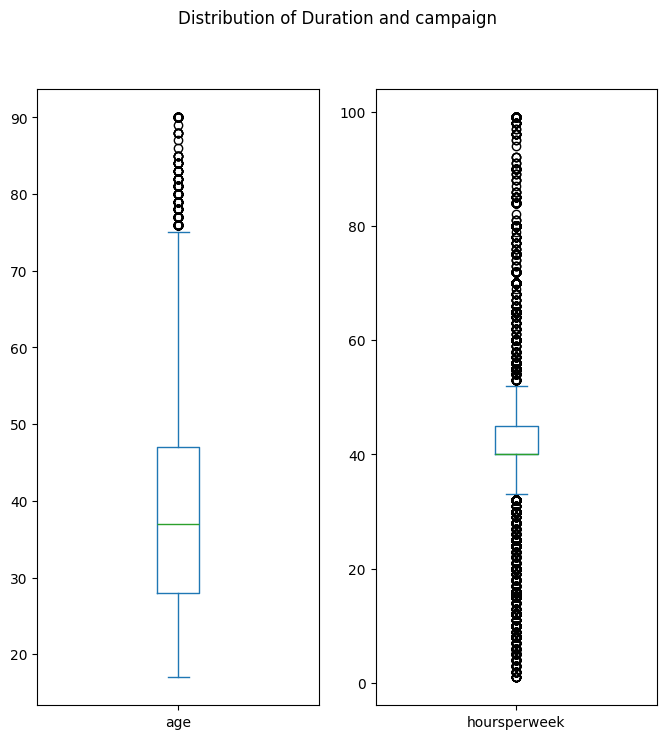

In [64]:
raw_data[['age','hoursperweek']].plot(kind = 'box',
                                  figsize = (8,8),
                                  subplots = True, layout = (1,2),
                                  sharex = False, sharey = False,
                                  title = 'Distribution of Duration and campaign')
plt.show()

## now let us take a look how numerical columns are affecting the target

In [98]:
df = pd.DataFrame()
df['age_wrt_salary_more_than_50k'] = (raw_data[raw_data['Salary'] == ' <=50K'].describe())['age']
df['age_wrt_salary_less_than_50k'] = (raw_data[raw_data['Salary'] == ' >50K'].describe())['age']
df
# there is white-space issue here in the salary column

,age_wrt_salary_more_than_50k,age_wrt_salary_less_than_50k
count,34013.000000,11208.000000
mean,36.749566,44.006067
std,13.564858,10.340502
min,17.000000,19.000000
25%,26.000000,36.000000
50%,34.000000,43.000000
75%,46.000000,51.000000
max,90.000000,90.000000


<Axes: title={'center': 'Age and Salary statistics'}>

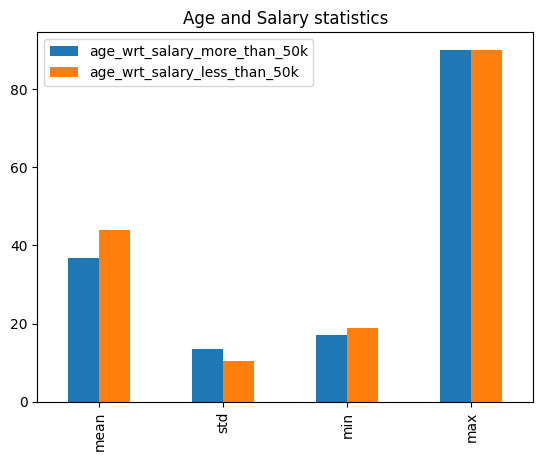

In [99]:
df.drop(['count','25%','50%','75%']).plot.bar(title = 'Age and Salary statistics')

In [100]:
df = pd.DataFrame()
df['capitalloss_wrt_salary_more_than_50k'] = (raw_data[raw_data['Salary'] == ' <=50K'].describe())['capitalloss']
df['capitalloss_wrt_salary_less_than_50k'] = (raw_data[raw_data['Salary'] == ' >50K'].describe())['capitalloss']
df
# there is white-space issue here in the salary column

,capitalloss_wrt_salary_more_than_50k,capitalloss_wrt_salary_less_than_50k
count,34013.000000,11208.000000
mean,53.969188,193.487063
std,312.007128,592.642319
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,0.000000
max,4356.000000,3683.000000


<Axes: title={'center': 'Capitalloss and Salary statistics'}>

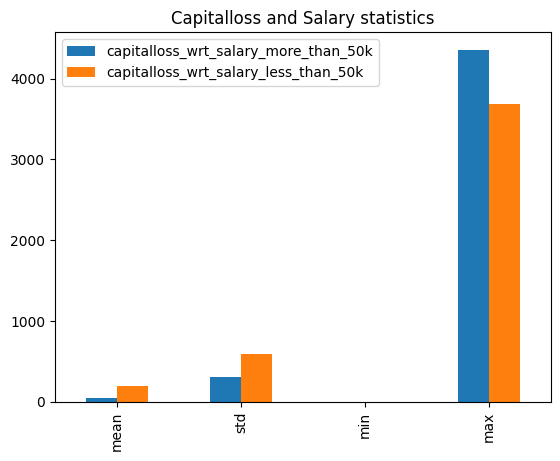

In [101]:
df.drop(['count','25%','50%','75%']).plot.bar(title = 'Capitalloss and Salary statistics')

In [102]:
df = pd.DataFrame()
df['hoursperweek_wrt_salary_more_than_50k'] = (raw_data[raw_data['Salary'] == ' <=50K'].describe())['hoursperweek']
df['hoursperweek_wrt_salary_less_than_50k'] = (raw_data[raw_data['Salary'] == ' >50K'].describe())['hoursperweek']
df
# there is white-space issue here in the salary column

,hoursperweek_wrt_salary_more_than_50k,hoursperweek_wrt_salary_less_than_50k
count,34013.000000,11208.000000
mean,39.372005,45.690489
std,11.974303,10.797764
min,1.000000,1.000000
25%,37.000000,40.000000
50%,40.000000,40.000000
75%,40.000000,50.000000
max,99.000000,99.000000


<Axes: title={'center': 'Hoursperweek and Salary statistics'}>

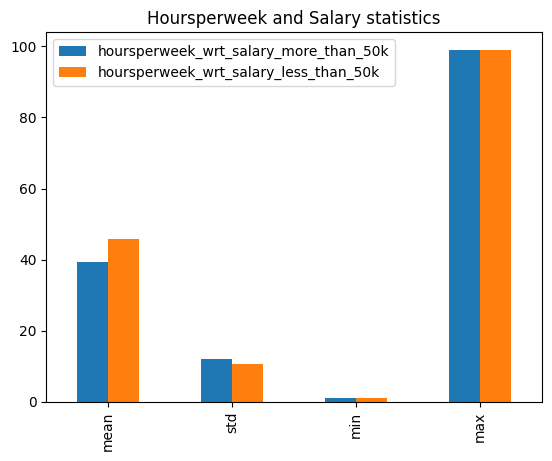

In [103]:
df.drop(['count','25%','50%','75%']).plot.bar(title = 'Hoursperweek and Salary statistics')

In [105]:
df = pd.DataFrame()
df['capitalgain_wrt_salary_more_than_50k'] = (raw_data[raw_data['Salary'] == ' <=50K'].describe())['capitalgain']
df['capitalgain_wrt_salary_less_than_50k'] = (raw_data[raw_data['Salary'] == ' >50K'].describe())['capitalgain']
df
# there is white-space issue here in the salary column

,capitalgain_wrt_salary_more_than_50k,capitalgain_wrt_salary_less_than_50k
count,34013.000000,11208.000000
mean,149.027783,3991.791667
std,927.460669,14616.543746
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,0.000000
max,41310.000000,99999.000000


<Axes: title={'center': 'Capitalgain and Salary statistics'}>

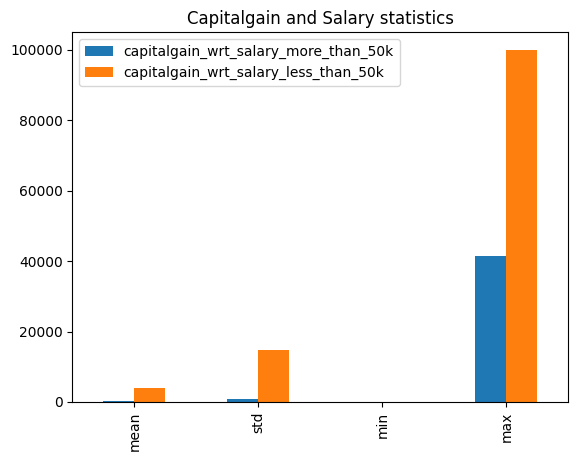

In [106]:
df.drop(['count','25%','50%','75%']).plot.bar(title = 'Capitalgain and Salary statistics')

## Categorical Variables

In [109]:
print('Number of categorical features:', len(categorical), '\n', categorical)

Number of categorical features: 9 
 ['workclass', 'education', 'maritalstatus', 'occupation', 'relationship', 'race', 'sex', 'native', 'Salary']


In [111]:
raw_data[categorical].head()

,workclass,education,maritalstatus,occupation,relationship,race,sex,native,Salary
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K


In [112]:
for var in categorical:
    print('{} number of unique categories in feature named {}'.format(len(raw_data[var].unique()), var))

7 number of unique categories in feature named workclass
16 number of unique categories in feature named education
7 number of unique categories in feature named maritalstatus
14 number of unique categories in feature named occupation
6 number of unique categories in feature named relationship
5 number of unique categories in feature named race
2 number of unique categories in feature named sex
40 number of unique categories in feature named native
2 number of unique categories in feature named Salary


In [114]:
for var in categorical:
    unique_cat = len(raw_data[var].unique())
    print('Feature {} has {} unique categories'.format(var, unique_cat))
    print(raw_data[var].value_counts())
    print()

Feature workclass has 7 unique categories
workclass
 Private             33306
 Self-emp-not-inc     3796
 Local-gov            3100
 State-gov            1946
 Self-emp-inc         1646
 Federal-gov          1406
 Without-pay            21
Name: count, dtype: int64

Feature education has 16 unique categories
education
 HS-grad         14783
 Some-college     9898
 Bachelors        7570
 Masters          2514
 Assoc-voc        1959
 11th             1619
 Assoc-acdm       1507
 10th             1223
 7th-8th           823
 Prof-school       785
 9th               676
 12th              577
 Doctorate         544
 5th-6th           449
 1st-4th           222
 Preschool          72
Name: count, dtype: int64

Feature maritalstatus has 7 unique categories
maritalstatus
 Married-civ-spouse       21055
 Never-married            14597
 Divorced                  6297
 Separated                 1411
 Widowed                   1277
 Married-spouse-absent      552
 Married-AF-spouse           32


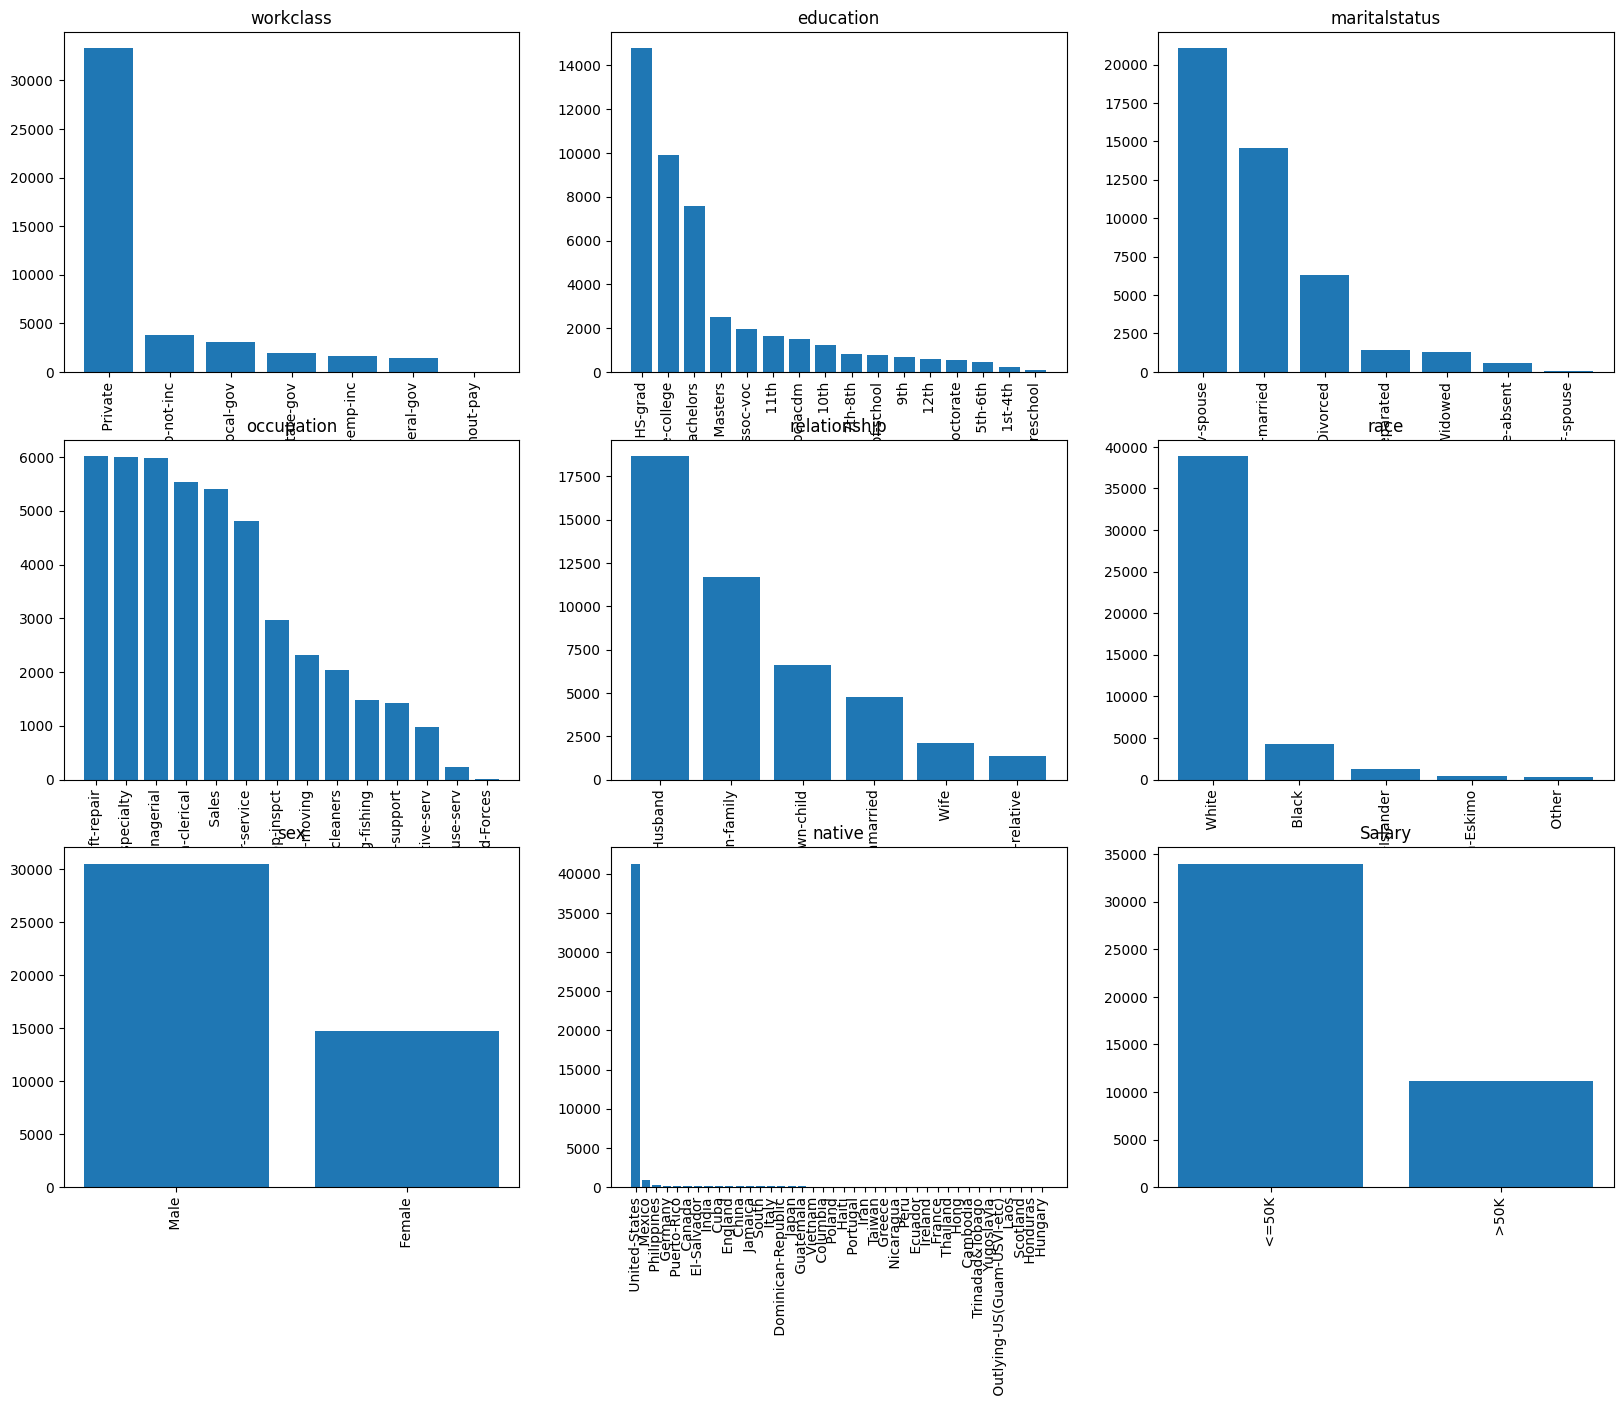

In [118]:
fig, axes = plt.subplots(3,3, sharex = False, sharey = False, figsize = (20,15))

counter = 0
for var in categorical:
    value_counts = raw_data[var].value_counts()

    trace_x = counter // 3
    trace_y = counter % 3
    x_pos = np.arange(0, len(value_counts))

    axes[trace_x, trace_y].bar(x_pos, value_counts.values, tick_label = value_counts.index)

    axes[trace_x, trace_y].set_title(var)

    for tick in axes[trace_x, trace_y].get_xticklabels():
        tick.set_rotation(90)

    counter +=1

plt.show()

## Bar plot for all categorical variables in the dataset

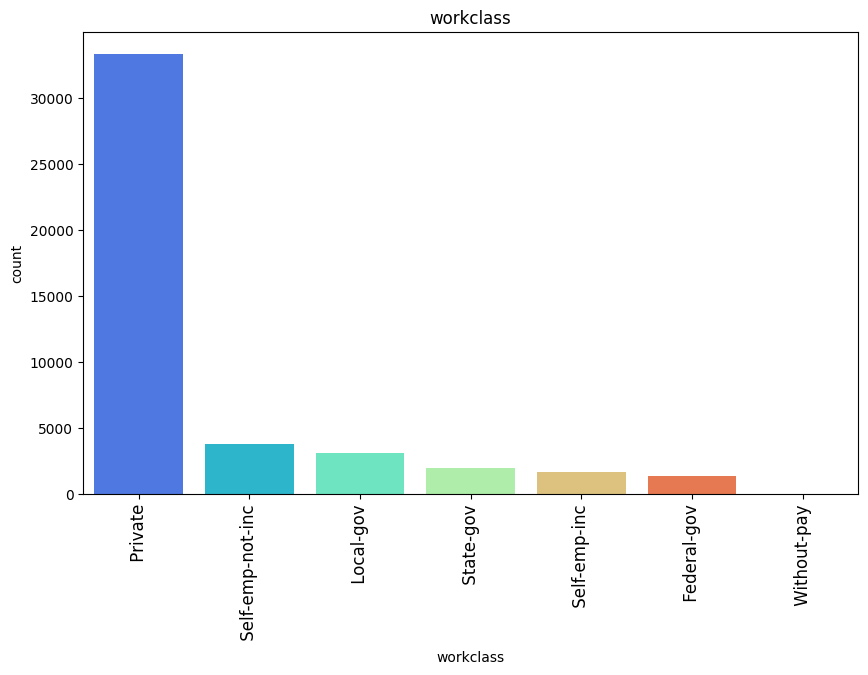

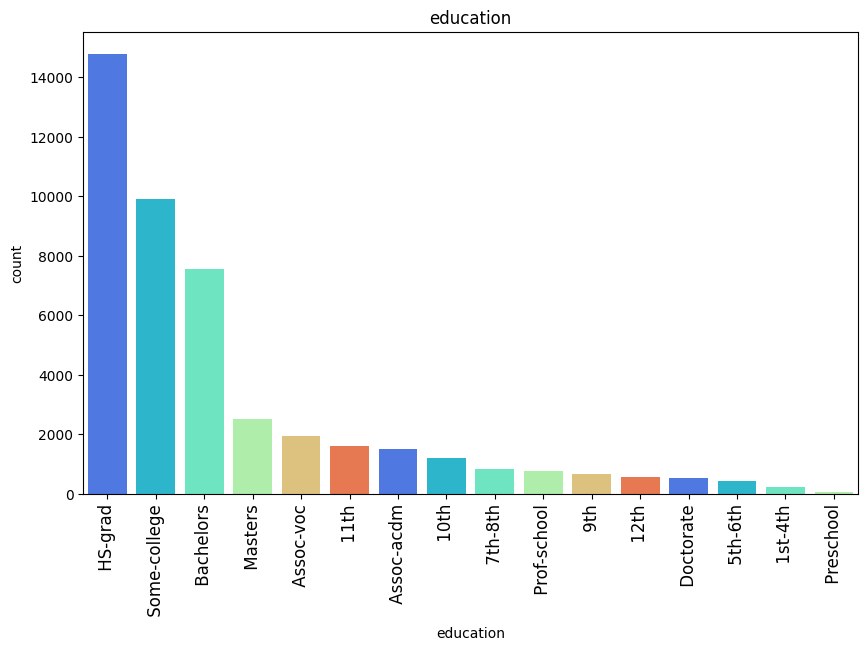

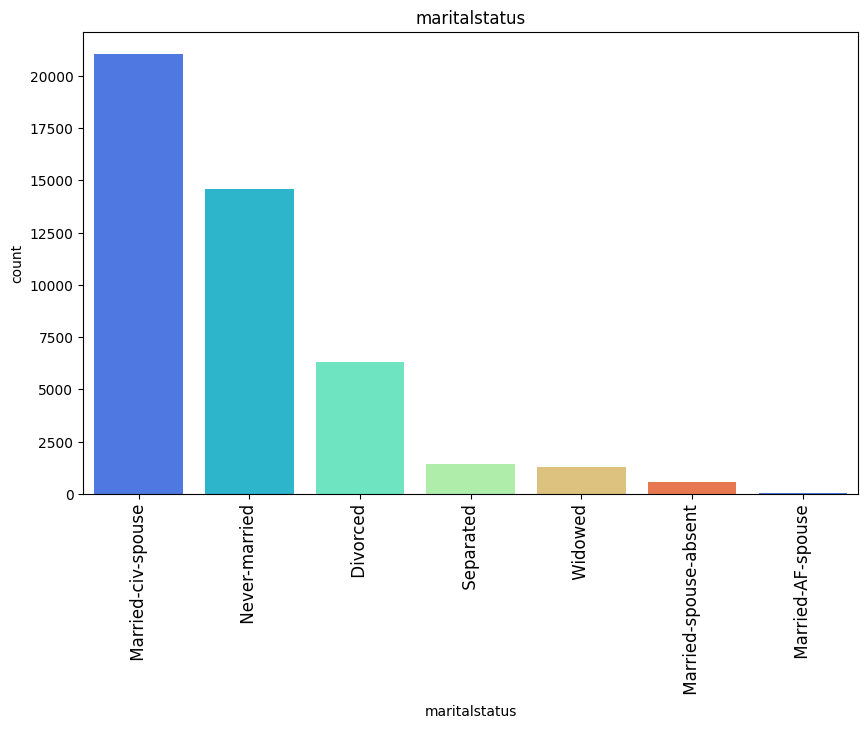

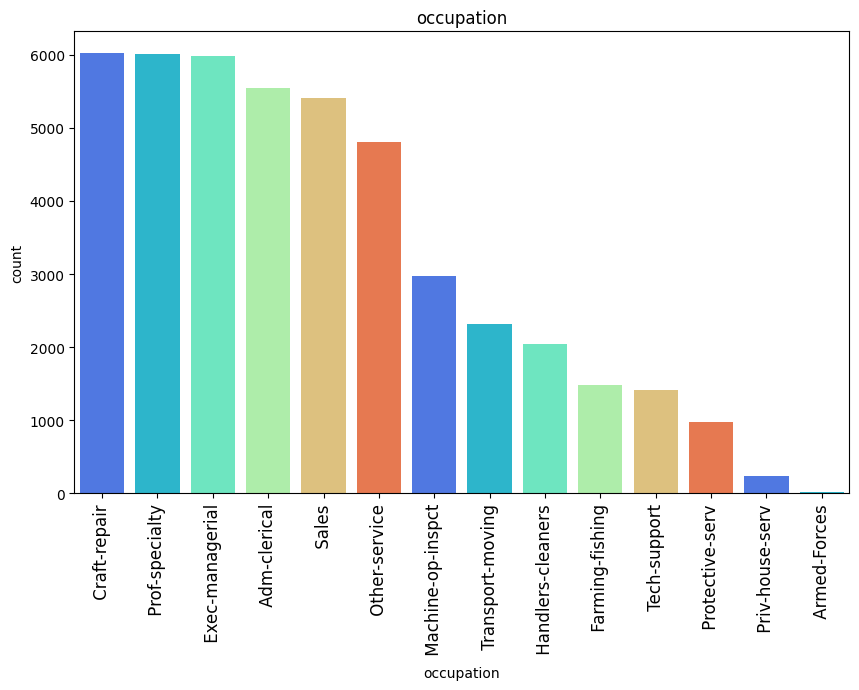

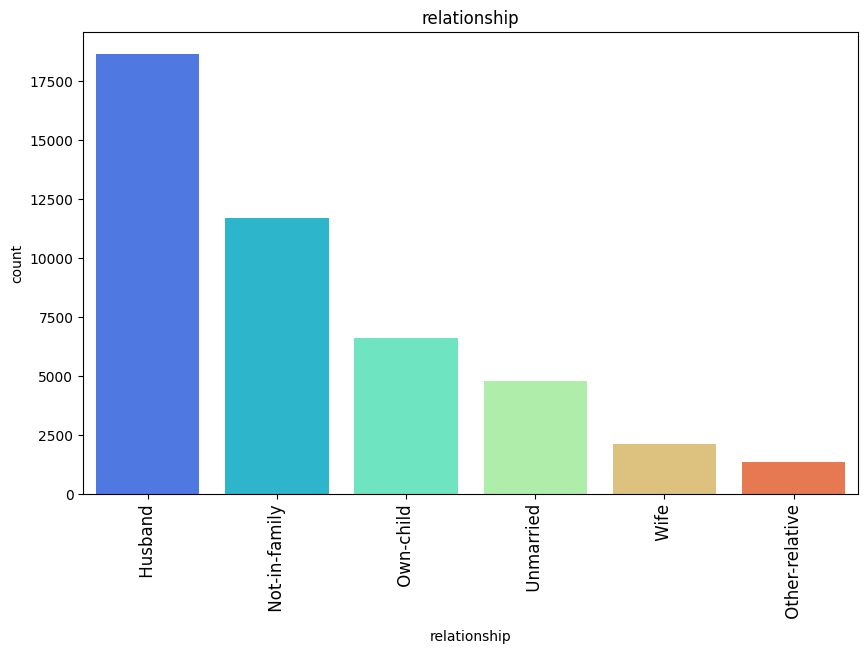

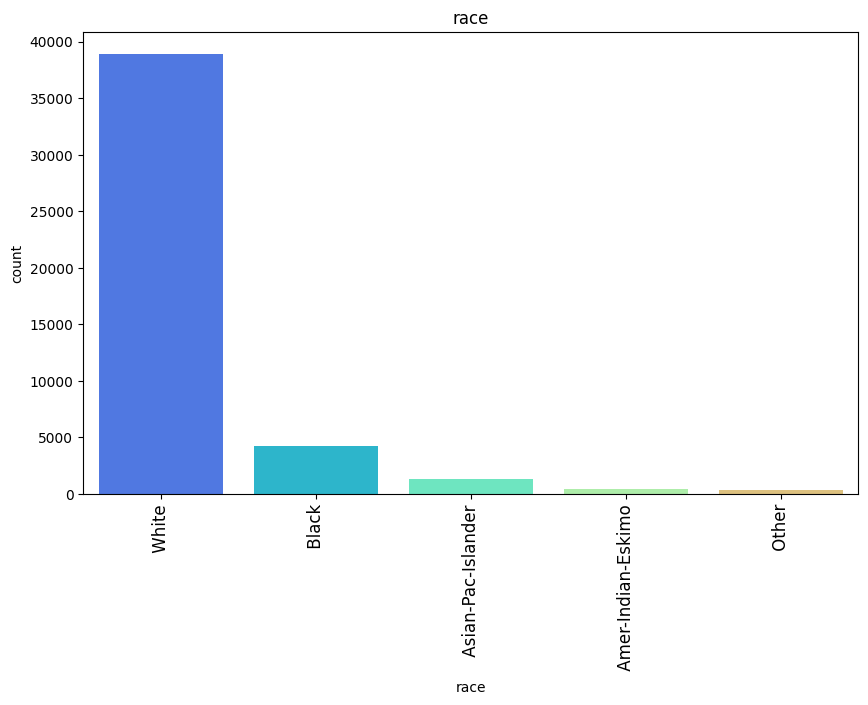

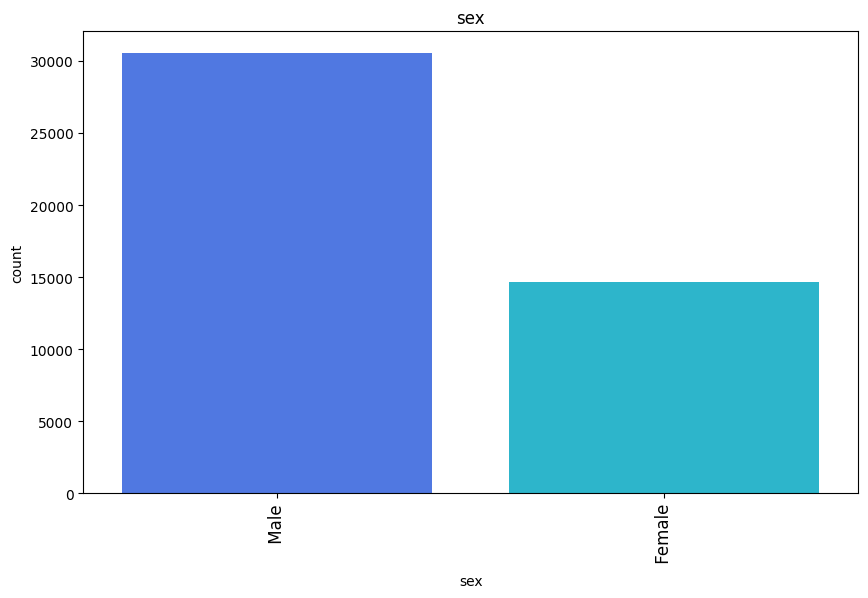

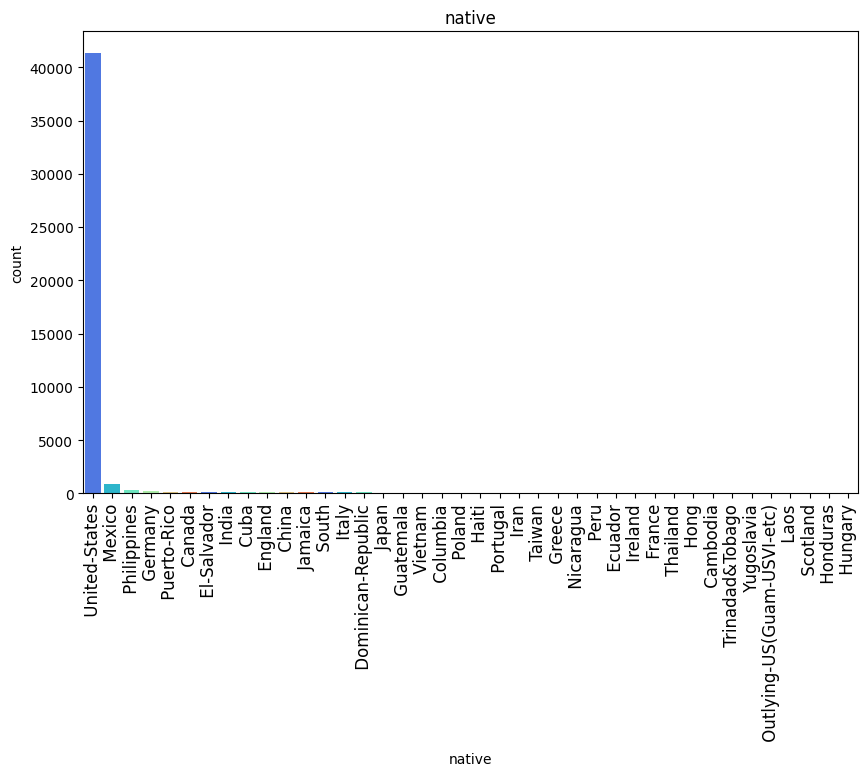

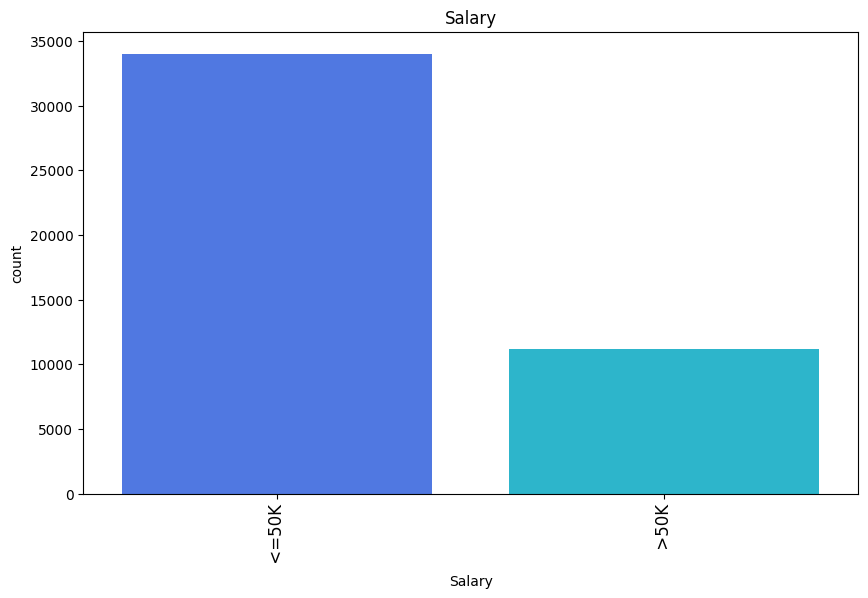

In [127]:
pal = sns.color_palette('rainbow')
for var in categorical:
    plt.figure(figsize = (10,6))
    sns.countplot(x = var, data = raw_data, palette = pal,
                order = raw_data[var].value_counts().index);
    plt.xticks(rotation = 90, fontsize = 12)
    plt.title(var)

## Checking for imbalance

In [129]:
countlessthanfifty = len(raw_data[raw_data.Salary == ' <=50K'])
countgreaterthanfifty = len(raw_data[raw_data.Salary == ' >50K'])
print('Percentage of Employees with salary greater than 50k: {:.2f}%'.format((countgreaterthanfifty / len(raw_data.Salary))*100))
print('Percentage of Employees with salary less than 50k: {:.2f}%'.format((countlessthanfifty / len(raw_data.Salary))*100))

Percentage of Employees with salary greater than 50k: 24.78%
Percentage of Employees with salary less than 50k: 75.22%


In [130]:
raw_data.Salary.value_counts()

Salary
 <=50K    34013
 >50K     11208
Name: count, dtype: int64

Text(0.5, 1.0, 'Salary')

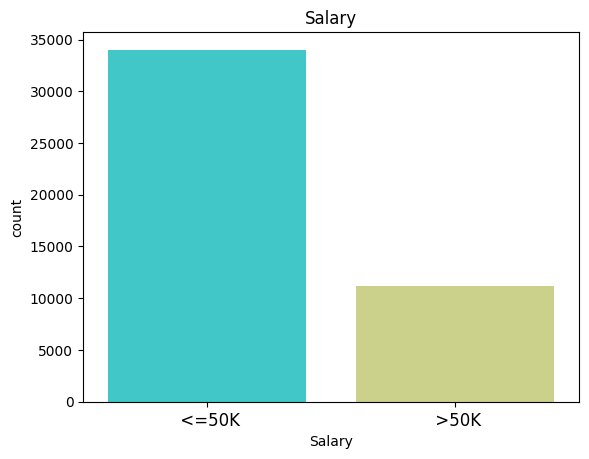

In [133]:
sns.countplot(x = 'Salary', data = raw_data, palette = 'rainbow', order = raw_data.Salary.value_counts().index)
plt.xticks(fontsize = 12)
plt.title('Salary')

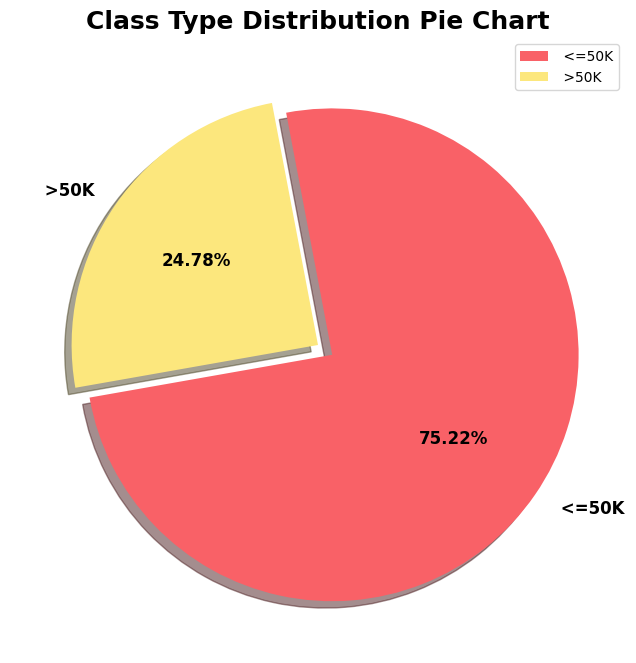

In [138]:
plt.figure(figsize = (12,8))
plt.pie(raw_data['Salary'].value_counts(),
       labels=raw_data.Salary.unique(),
       explode = [0.07,0.0],
       autopct= '%.2f%%',
        colors = ["#F96167", "#FCE77D"],
       shadow= True,
       startangle= 190,
       textprops = {'size':'large',
                   'fontweight':'bold',
                    'rotation': 0,
                   'color':'black'})
plt.legend(loc= 'upper right')
plt.title("Class Type Distribution Pie Chart", fontsize = 18, fontweight = 'bold')
plt.show()

# Data Visualization

In [143]:
df = pd.DataFrame()

df[' <=50K'] = raw_data[raw_data['Salary'] == ' <=50K']['workclass'].value_counts()
df[' >50K'] = raw_data[raw_data['Salary'] == ' >50K']['workclass'].value_counts()

<Axes: xlabel='workclass'>

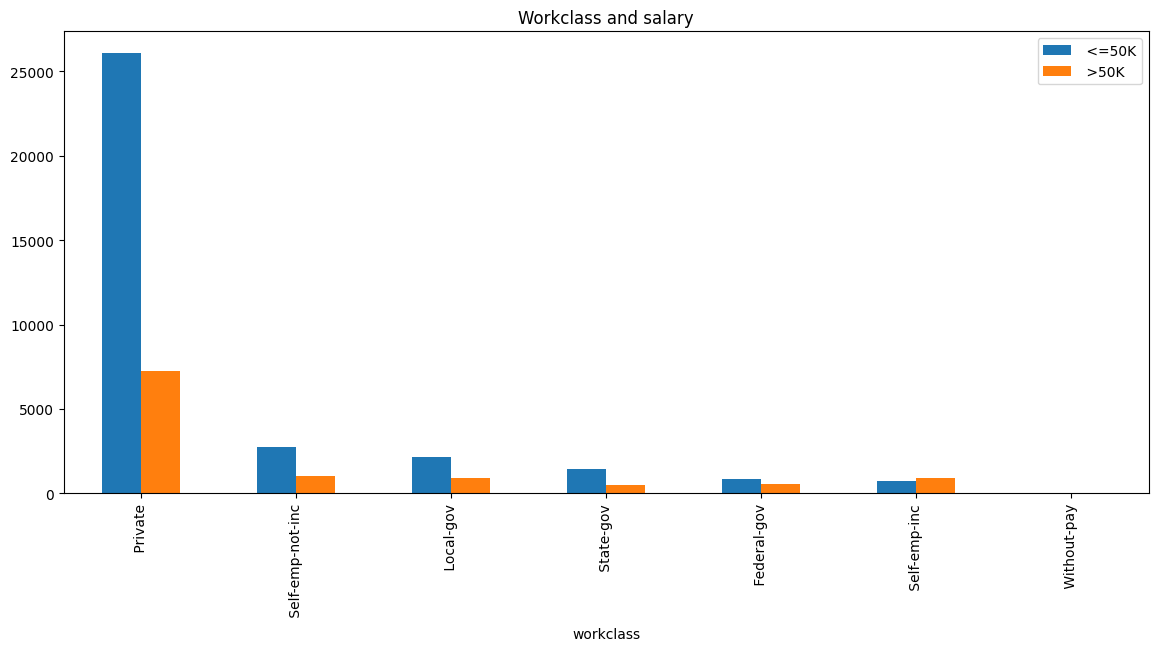

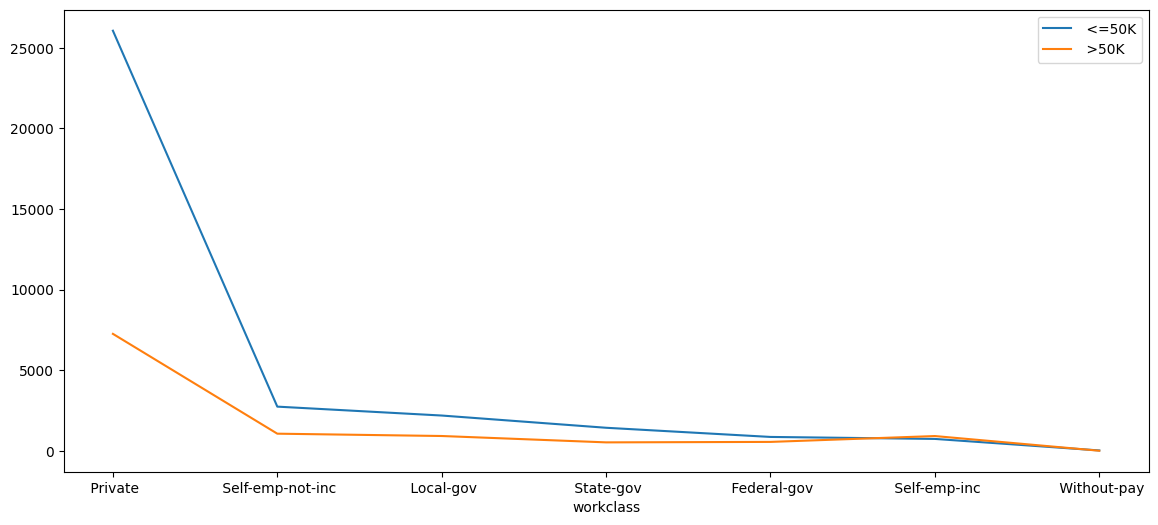

In [146]:
df.plot.bar(title = 'Workclass and salary', figsize = (14,6))
df.plot(figsize = (14,6))

<Axes: xlabel='Salary', ylabel='workclass'>

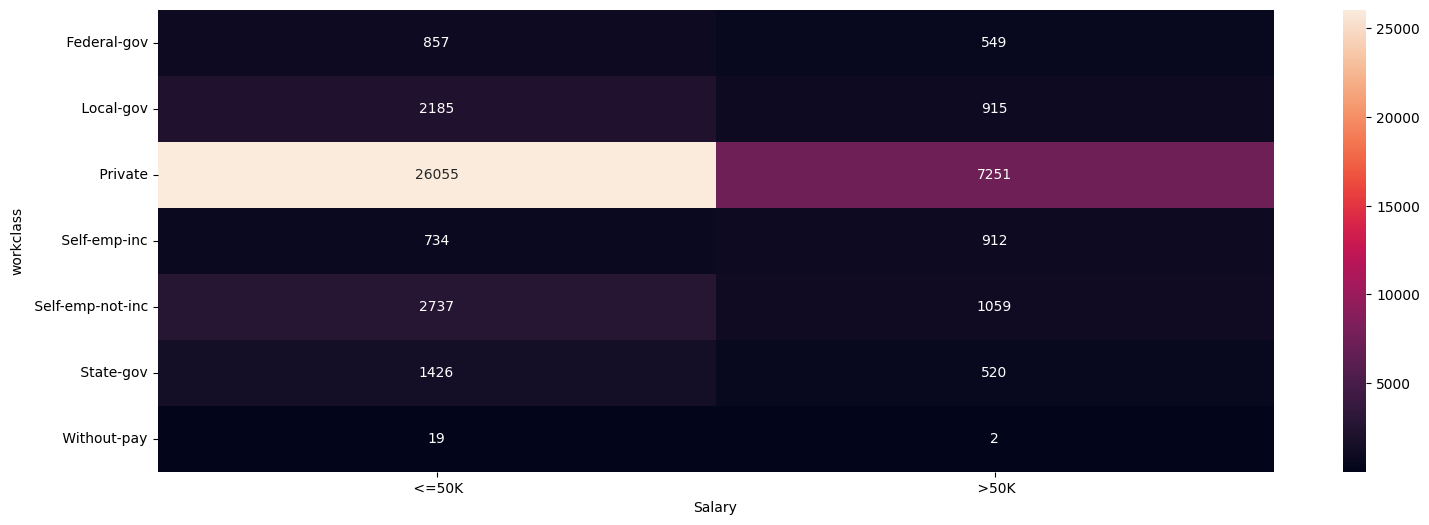

In [147]:
fig = plt.figure(figsize = (18,6))
sns.heatmap(pd.crosstab(index = raw_data['workclass'], columns = raw_data['Salary']), annot = True,
                    fmt = 'g')

<Axes: xlabel='education'>

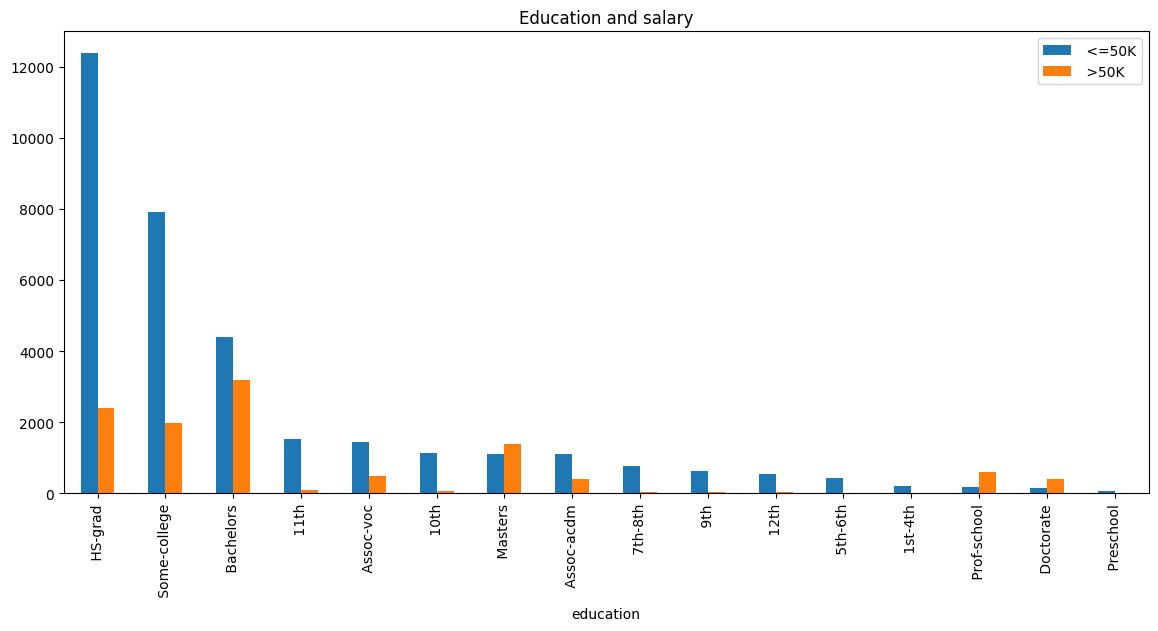

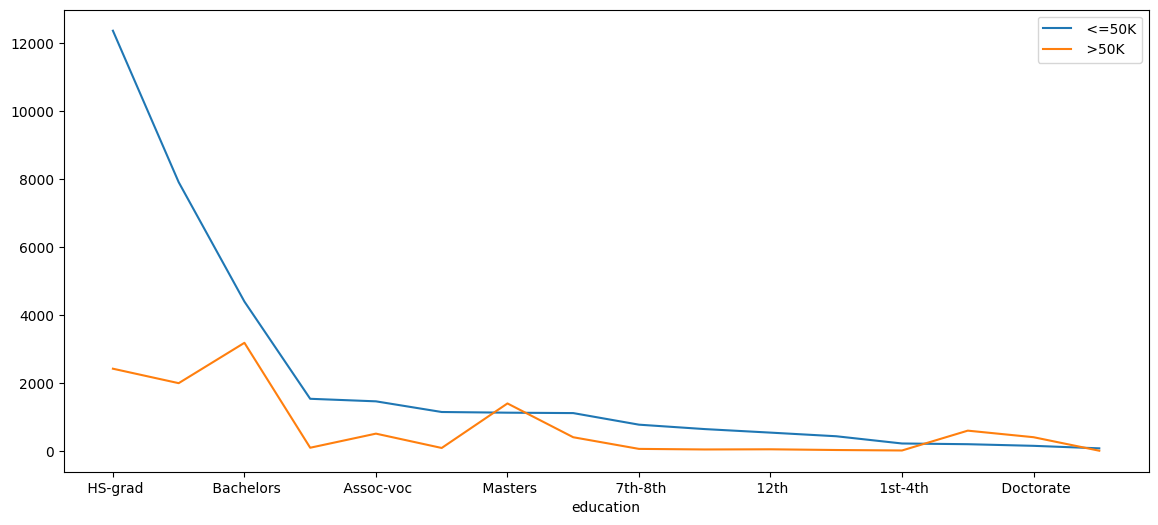

In [152]:
df = pd.DataFrame()

df[' <=50K'] = raw_data[raw_data['Salary'] == ' <=50K']['education'].value_counts()
df[' >50K'] = raw_data[raw_data['Salary'] == ' >50K']['education'].value_counts()
df.plot.bar(title = 'Education and salary', figsize = (14,6))
df.plot(figsize = (14,6))

<Axes: xlabel='Salary', ylabel='education'>

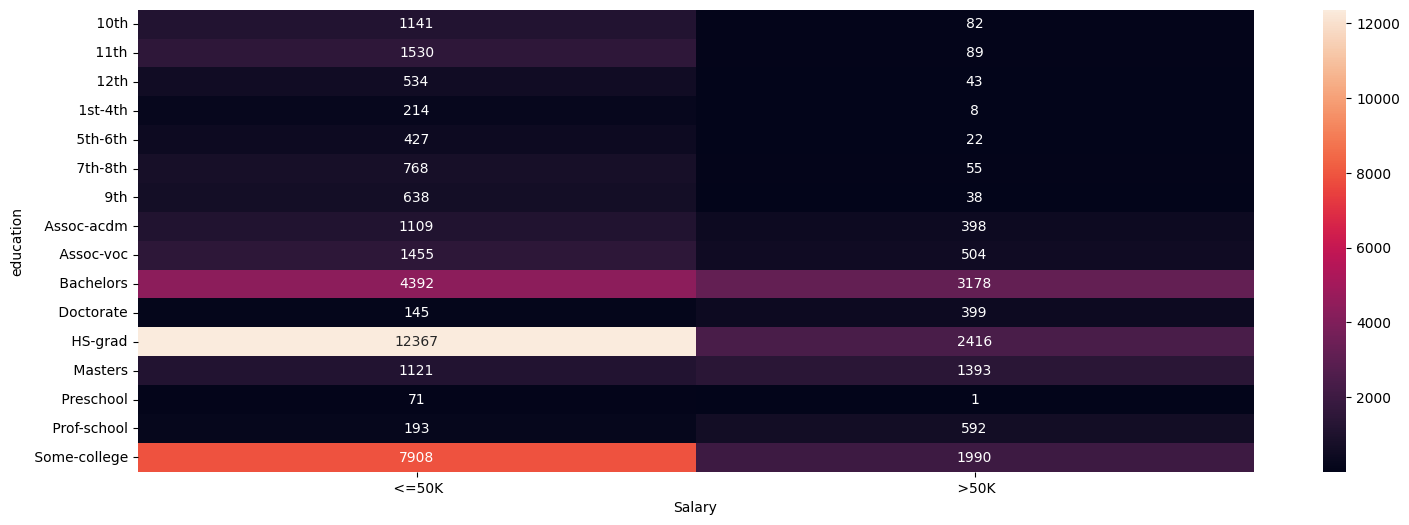

In [153]:
fig = plt.figure(figsize = (18,6))
sns.heatmap(pd.crosstab(index = raw_data['education'], columns = raw_data['Salary']), annot = True,
                    fmt = 'g')

<Axes: xlabel='maritalstatus'>

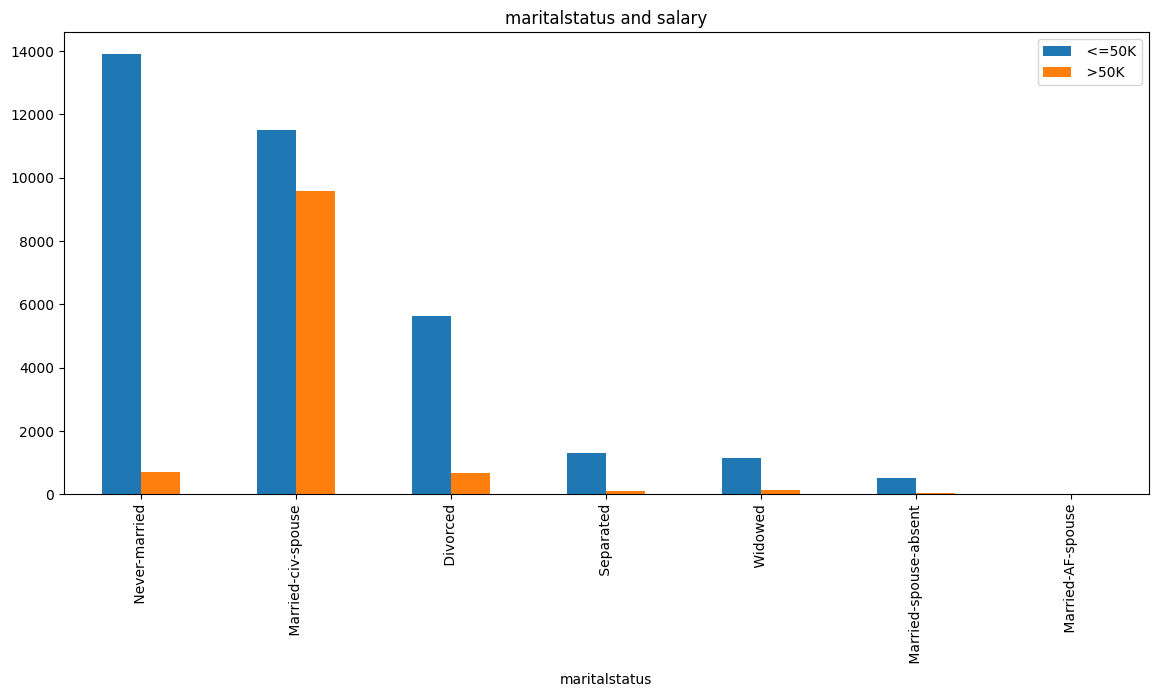

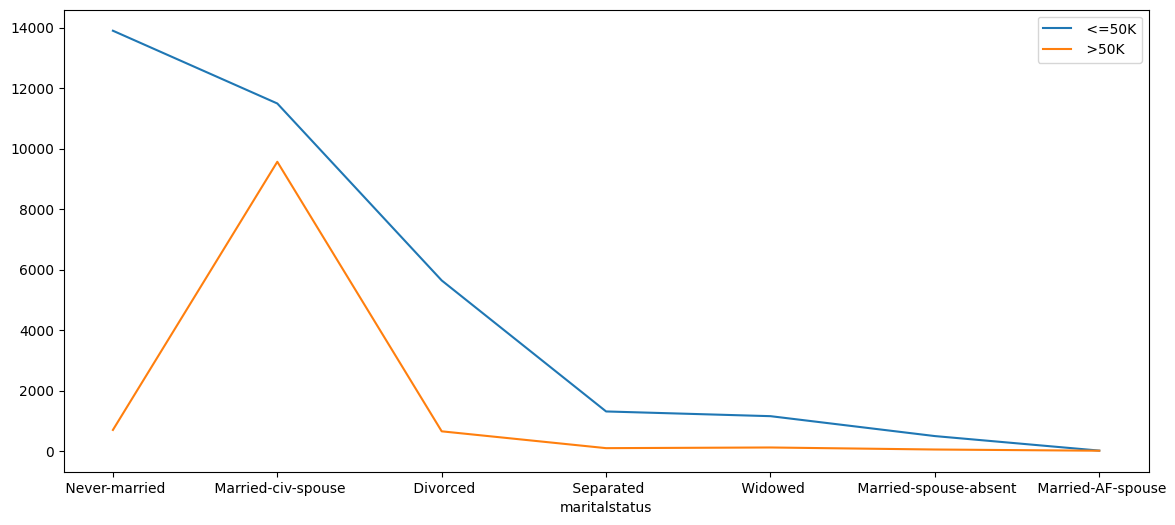

In [155]:
df = pd.DataFrame()

df[' <=50K'] = raw_data[raw_data['Salary'] == ' <=50K']['maritalstatus'].value_counts()
df[' >50K'] = raw_data[raw_data['Salary'] == ' >50K']['maritalstatus'].value_counts()
df.plot.bar(title = 'maritalstatus and salary', figsize = (14,6))
df.plot(figsize = (14,6))

<Axes: xlabel='Salary', ylabel='maritalstatus'>

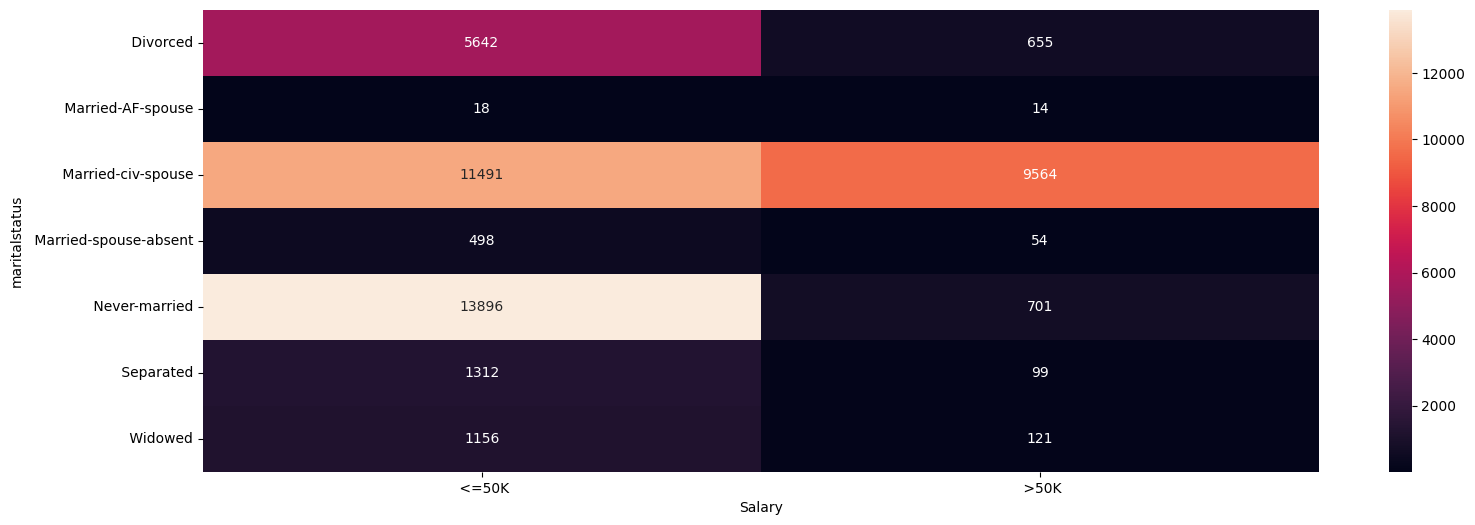

In [156]:
fig = plt.figure(figsize = (18,6))
sns.heatmap(pd.crosstab(index = raw_data['maritalstatus'], columns = raw_data['Salary']), annot = True,
                    fmt = 'g')

<Axes: xlabel='occupation'>

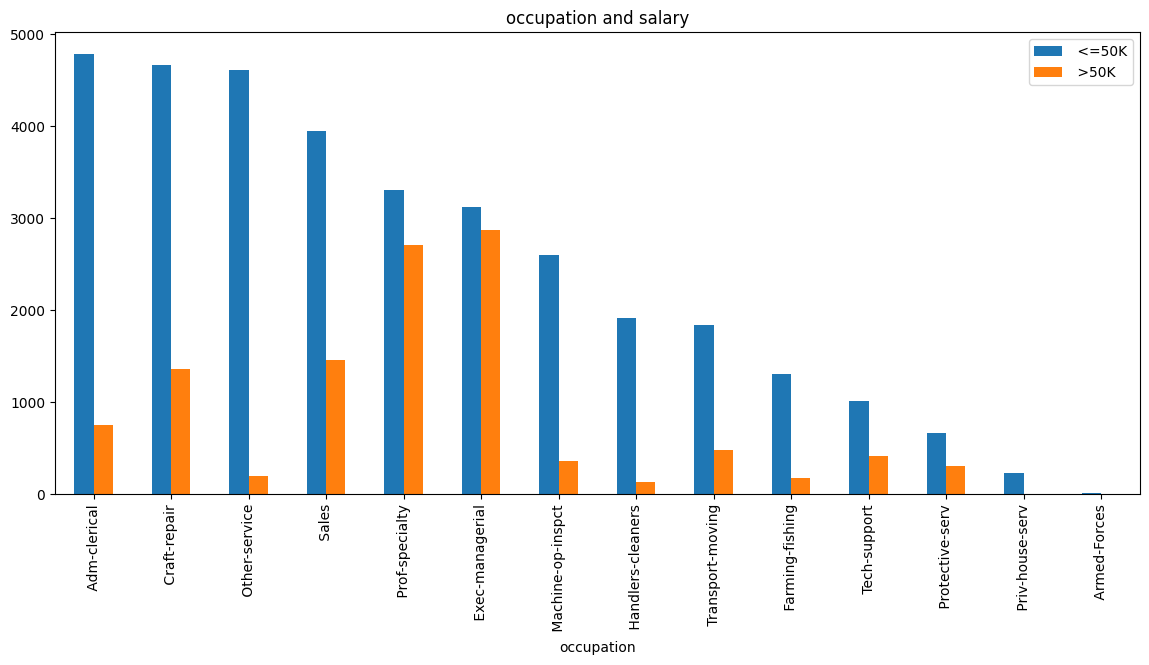

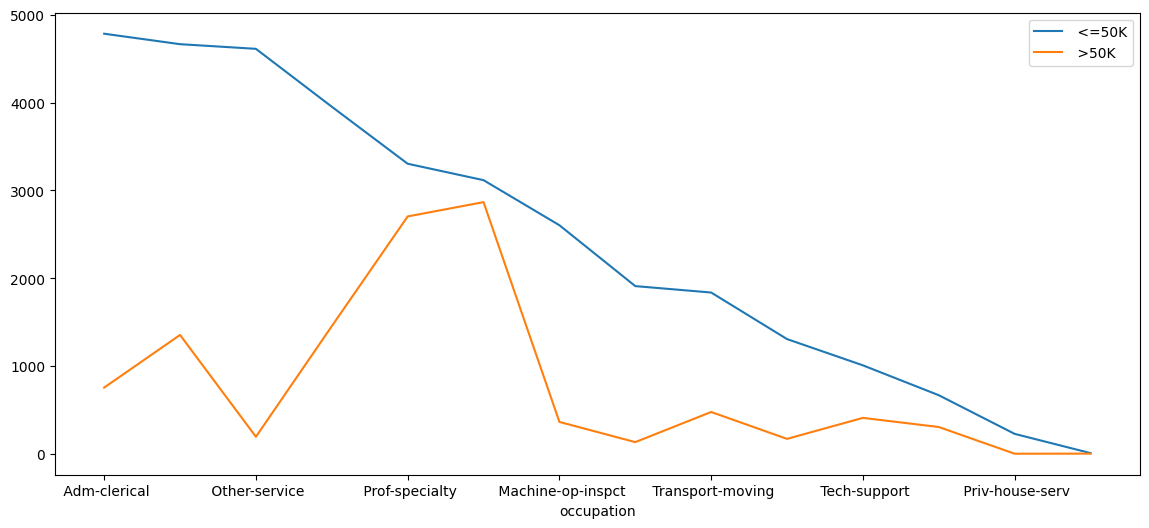

In [157]:
df = pd.DataFrame()

df[' <=50K'] = raw_data[raw_data['Salary'] == ' <=50K']['occupation'].value_counts()
df[' >50K'] = raw_data[raw_data['Salary'] == ' >50K']['occupation'].value_counts()
df.plot.bar(title = 'occupation and salary', figsize = (14,6))
df.plot(figsize = (14,6))

<Axes: xlabel='Salary', ylabel='occupation'>

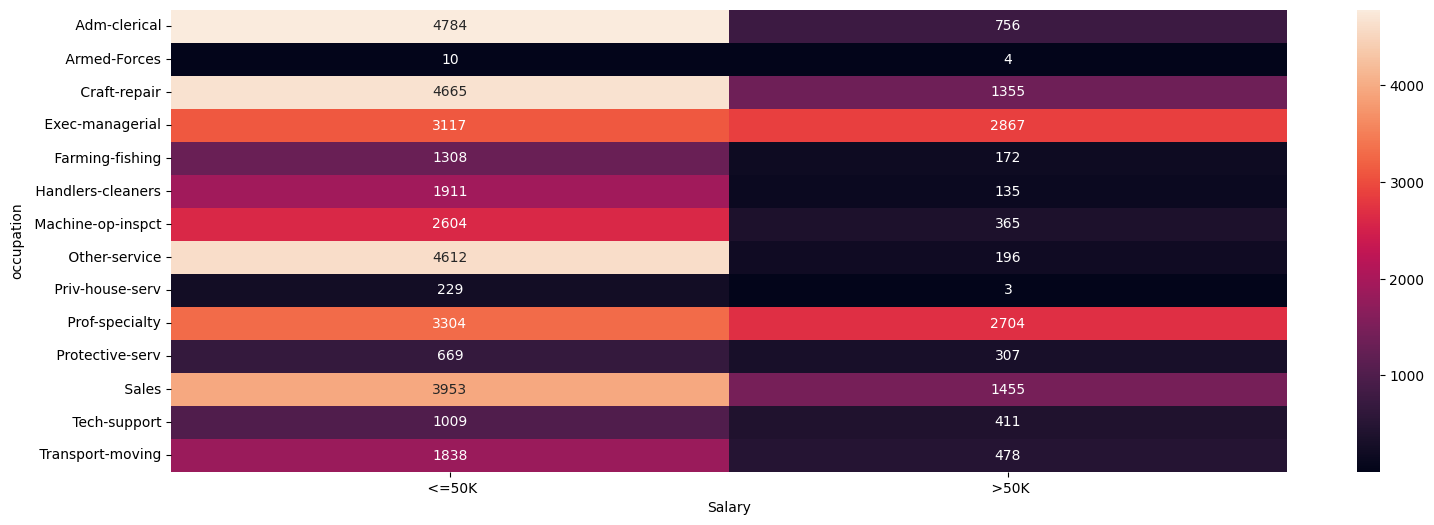

In [158]:
fig = plt.figure(figsize = (18,6))
sns.heatmap(pd.crosstab(index = raw_data['occupation'], columns = raw_data['Salary']), annot = True,
                    fmt = 'g')

<Axes: xlabel='relationship'>

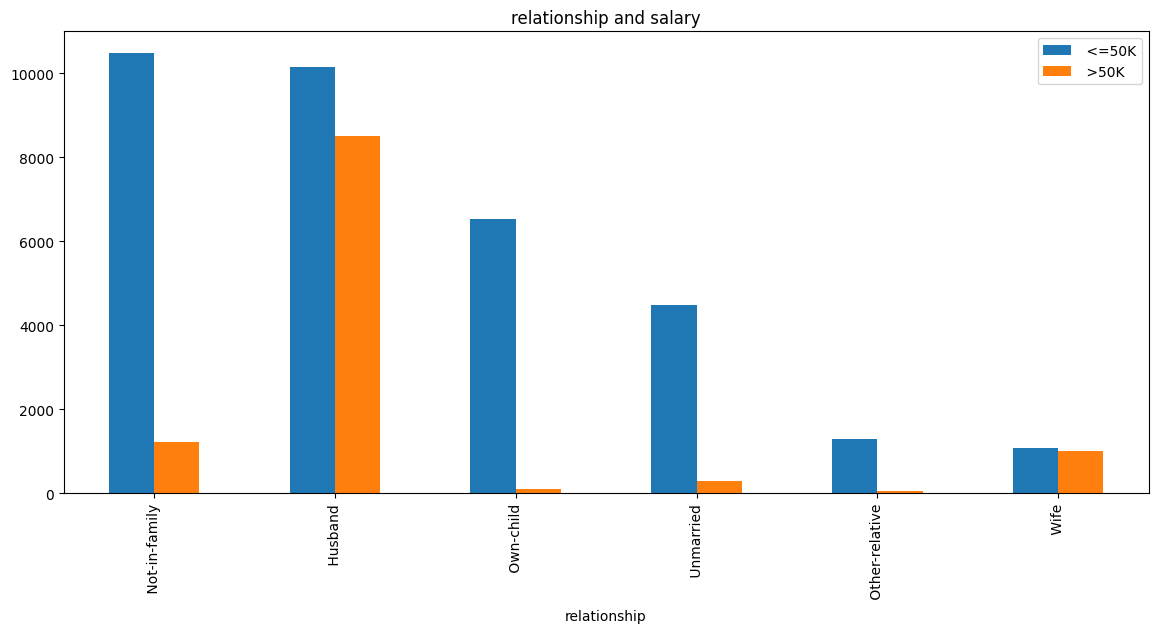

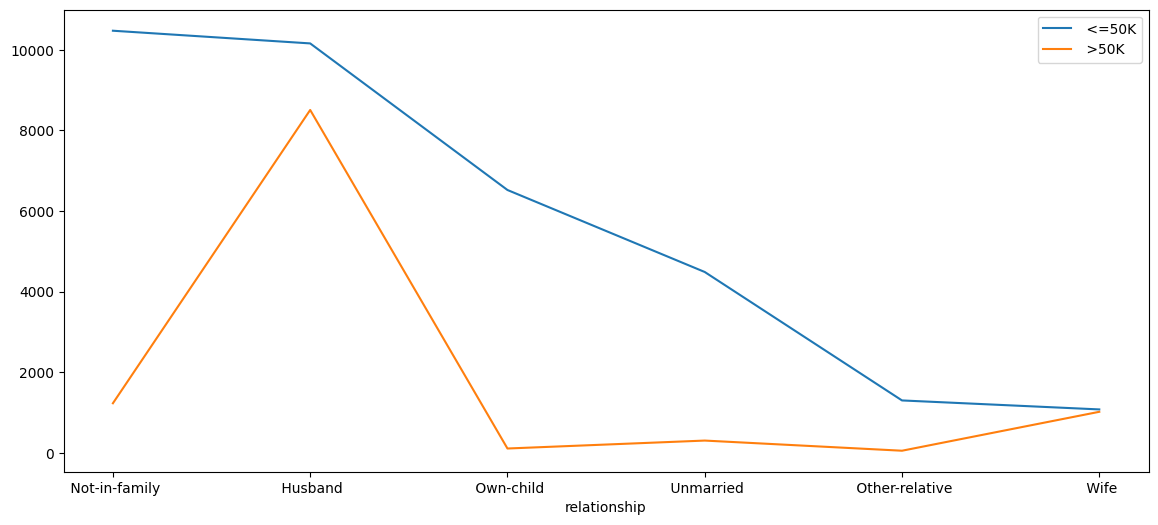

In [159]:
df = pd.DataFrame()

df[' <=50K'] = raw_data[raw_data['Salary'] == ' <=50K']['relationship'].value_counts()
df[' >50K'] = raw_data[raw_data['Salary'] == ' >50K']['relationship'].value_counts()
df.plot.bar(title = 'relationship and salary', figsize = (14,6))
df.plot(figsize = (14,6))

<Axes: xlabel='Salary', ylabel='relationship'>

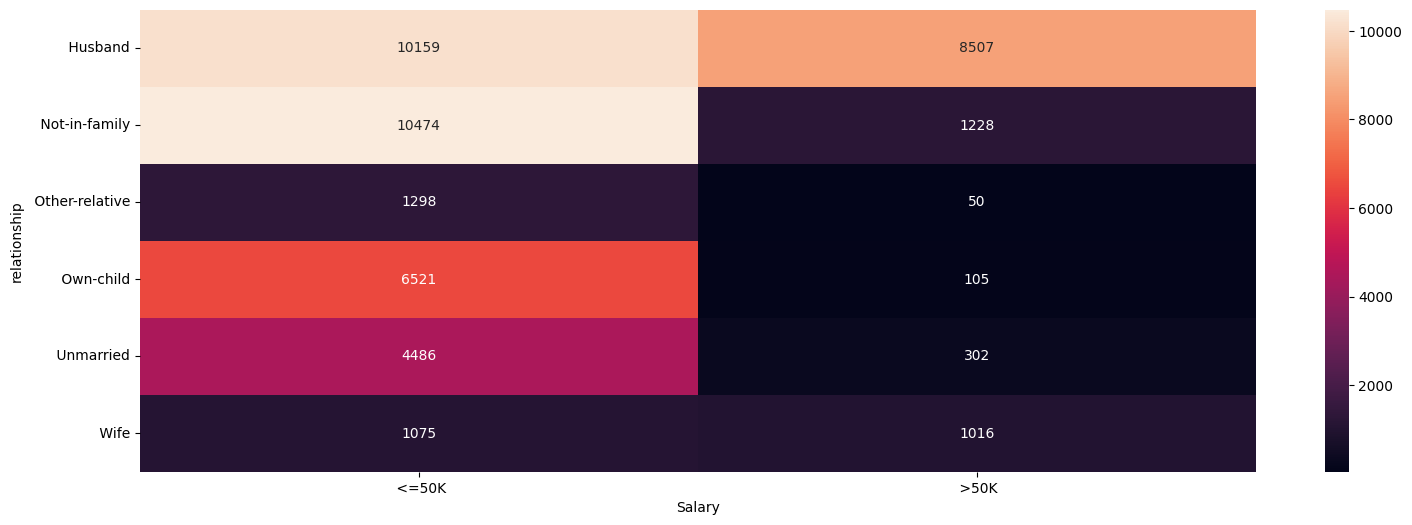

In [160]:
fig = plt.figure(figsize = (18,6))
sns.heatmap(pd.crosstab(index = raw_data['relationship'], columns = raw_data['Salary']), annot = True,
                    fmt = 'g')

<Axes: xlabel='race'>

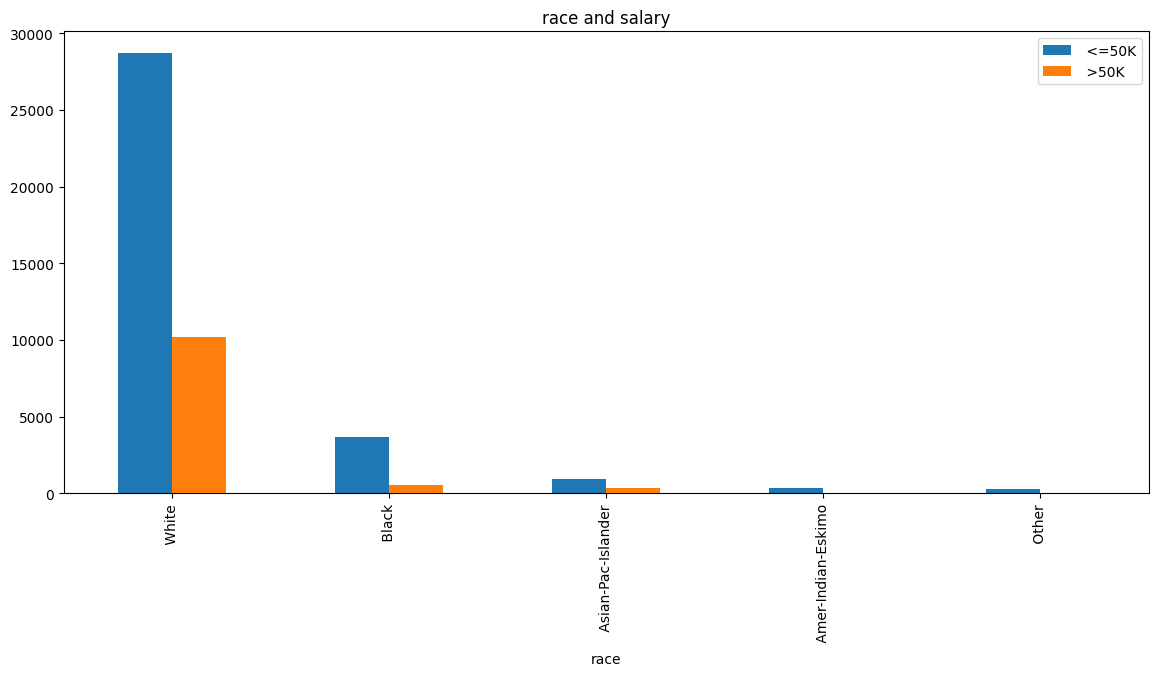

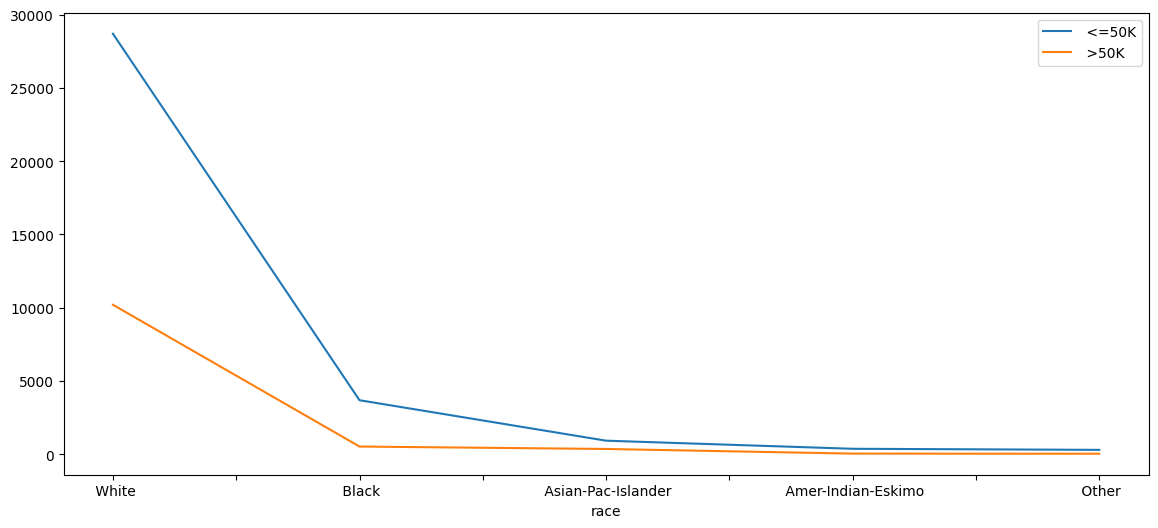

In [161]:
df = pd.DataFrame()

df[' <=50K'] = raw_data[raw_data['Salary'] == ' <=50K']['race'].value_counts()
df[' >50K'] = raw_data[raw_data['Salary'] == ' >50K']['race'].value_counts()
df.plot.bar(title = 'race and salary', figsize = (14,6))
df.plot(figsize = (14,6))

<Axes: xlabel='Salary', ylabel='race'>

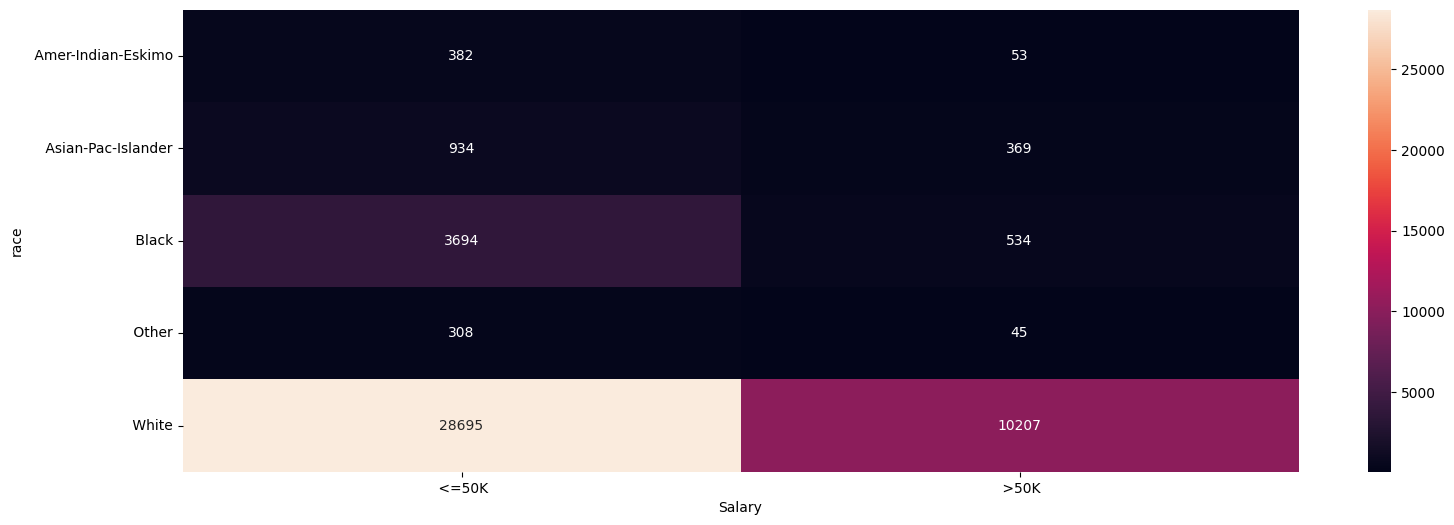

In [162]:
fig = plt.figure(figsize = (18,6))
sns.heatmap(pd.crosstab(index = raw_data['race'], columns = raw_data['Salary']), annot = True,
                    fmt = 'g')

<Axes: xlabel='sex'>

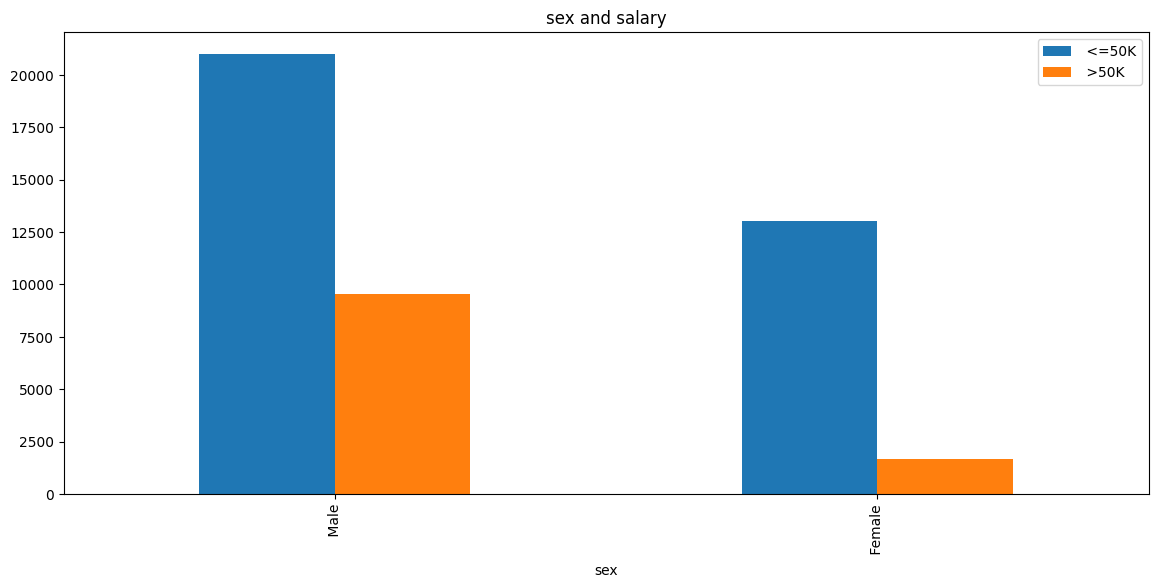

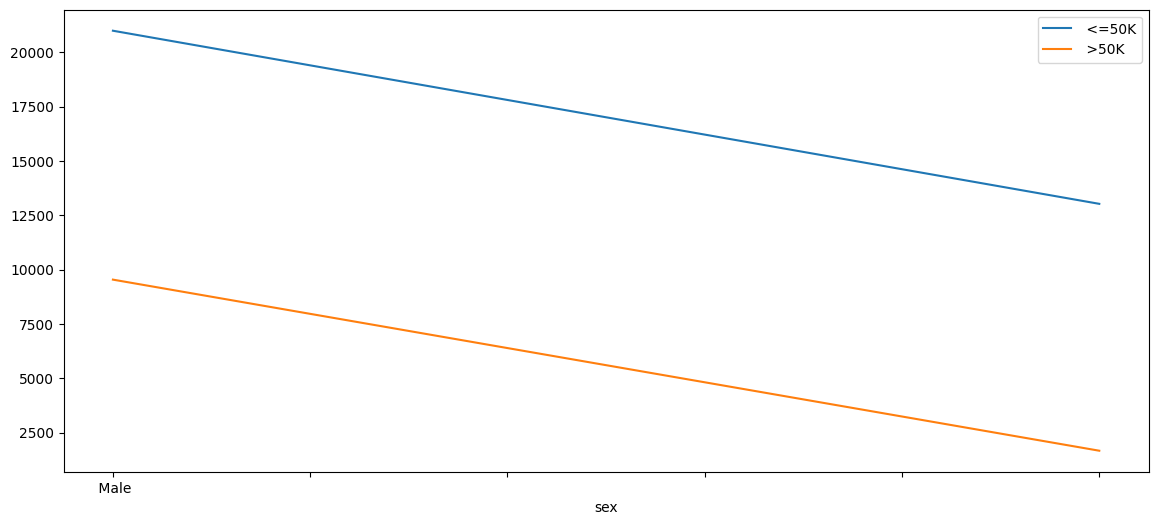

In [163]:
df = pd.DataFrame()

df[' <=50K'] = raw_data[raw_data['Salary'] == ' <=50K']['sex'].value_counts()
df[' >50K'] = raw_data[raw_data['Salary'] == ' >50K']['sex'].value_counts()
df.plot.bar(title = 'sex and salary', figsize = (14,6))
df.plot(figsize = (14,6))

<Axes: xlabel='Salary', ylabel='sex'>

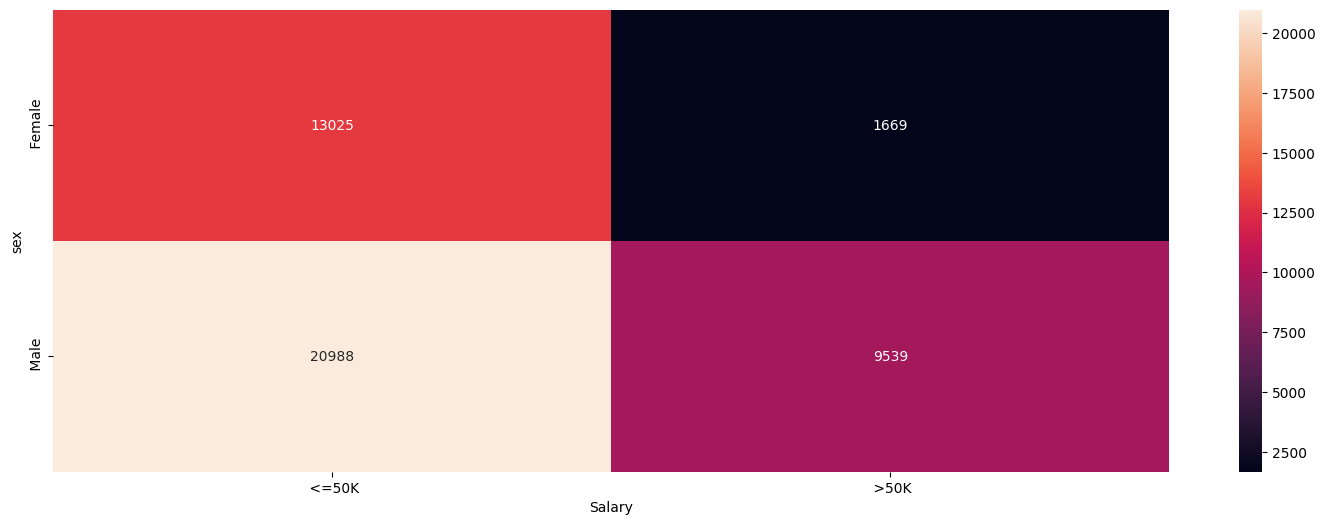

In [164]:
fig = plt.figure(figsize = (18,6))
sns.heatmap(pd.crosstab(index = raw_data['sex'], columns = raw_data['Salary']), annot = True,
                    fmt = 'g')

<Axes: xlabel='native'>

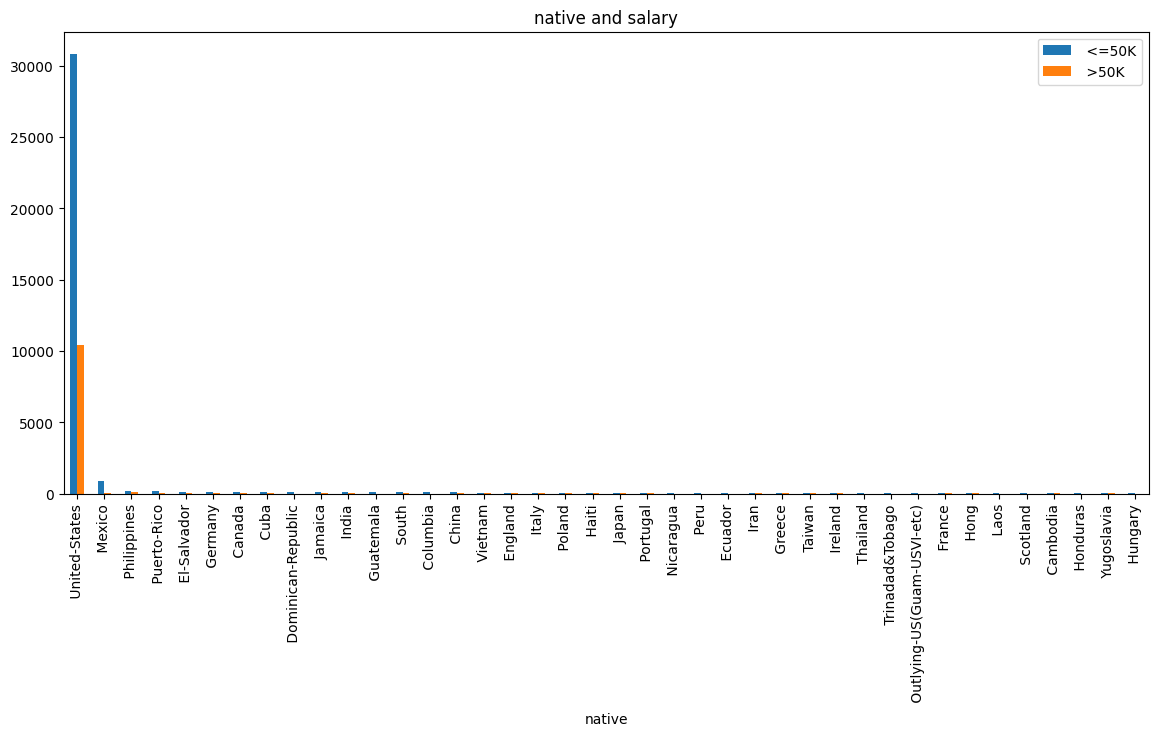

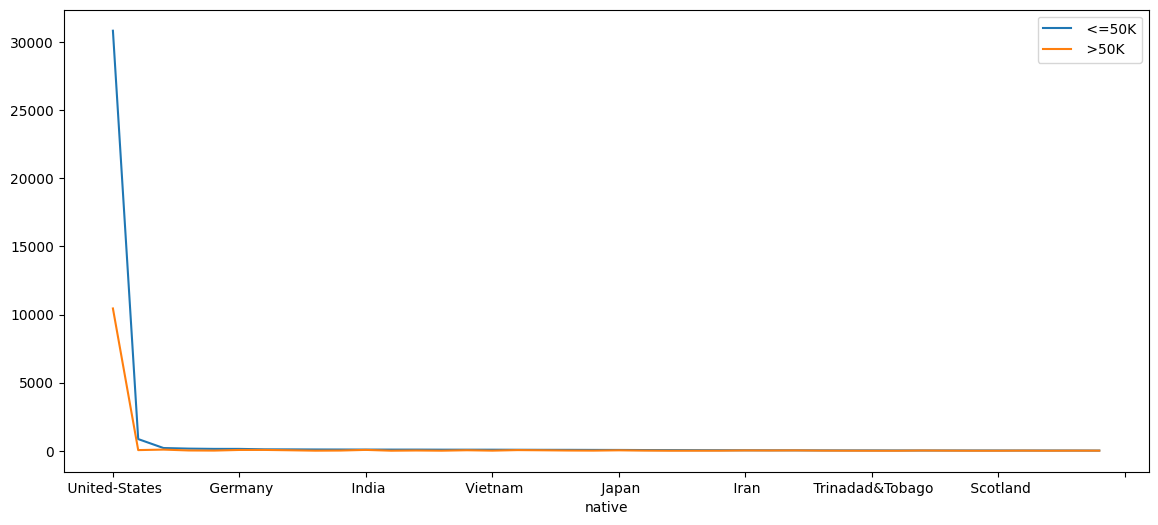

In [165]:
df = pd.DataFrame()

df[' <=50K'] = raw_data[raw_data['Salary'] == ' <=50K']['native'].value_counts()
df[' >50K'] = raw_data[raw_data['Salary'] == ' >50K']['native'].value_counts()
df.plot.bar(title = 'native and salary', figsize = (14,6))
df.plot(figsize = (14,6))

<Axes: xlabel='Salary', ylabel='native'>

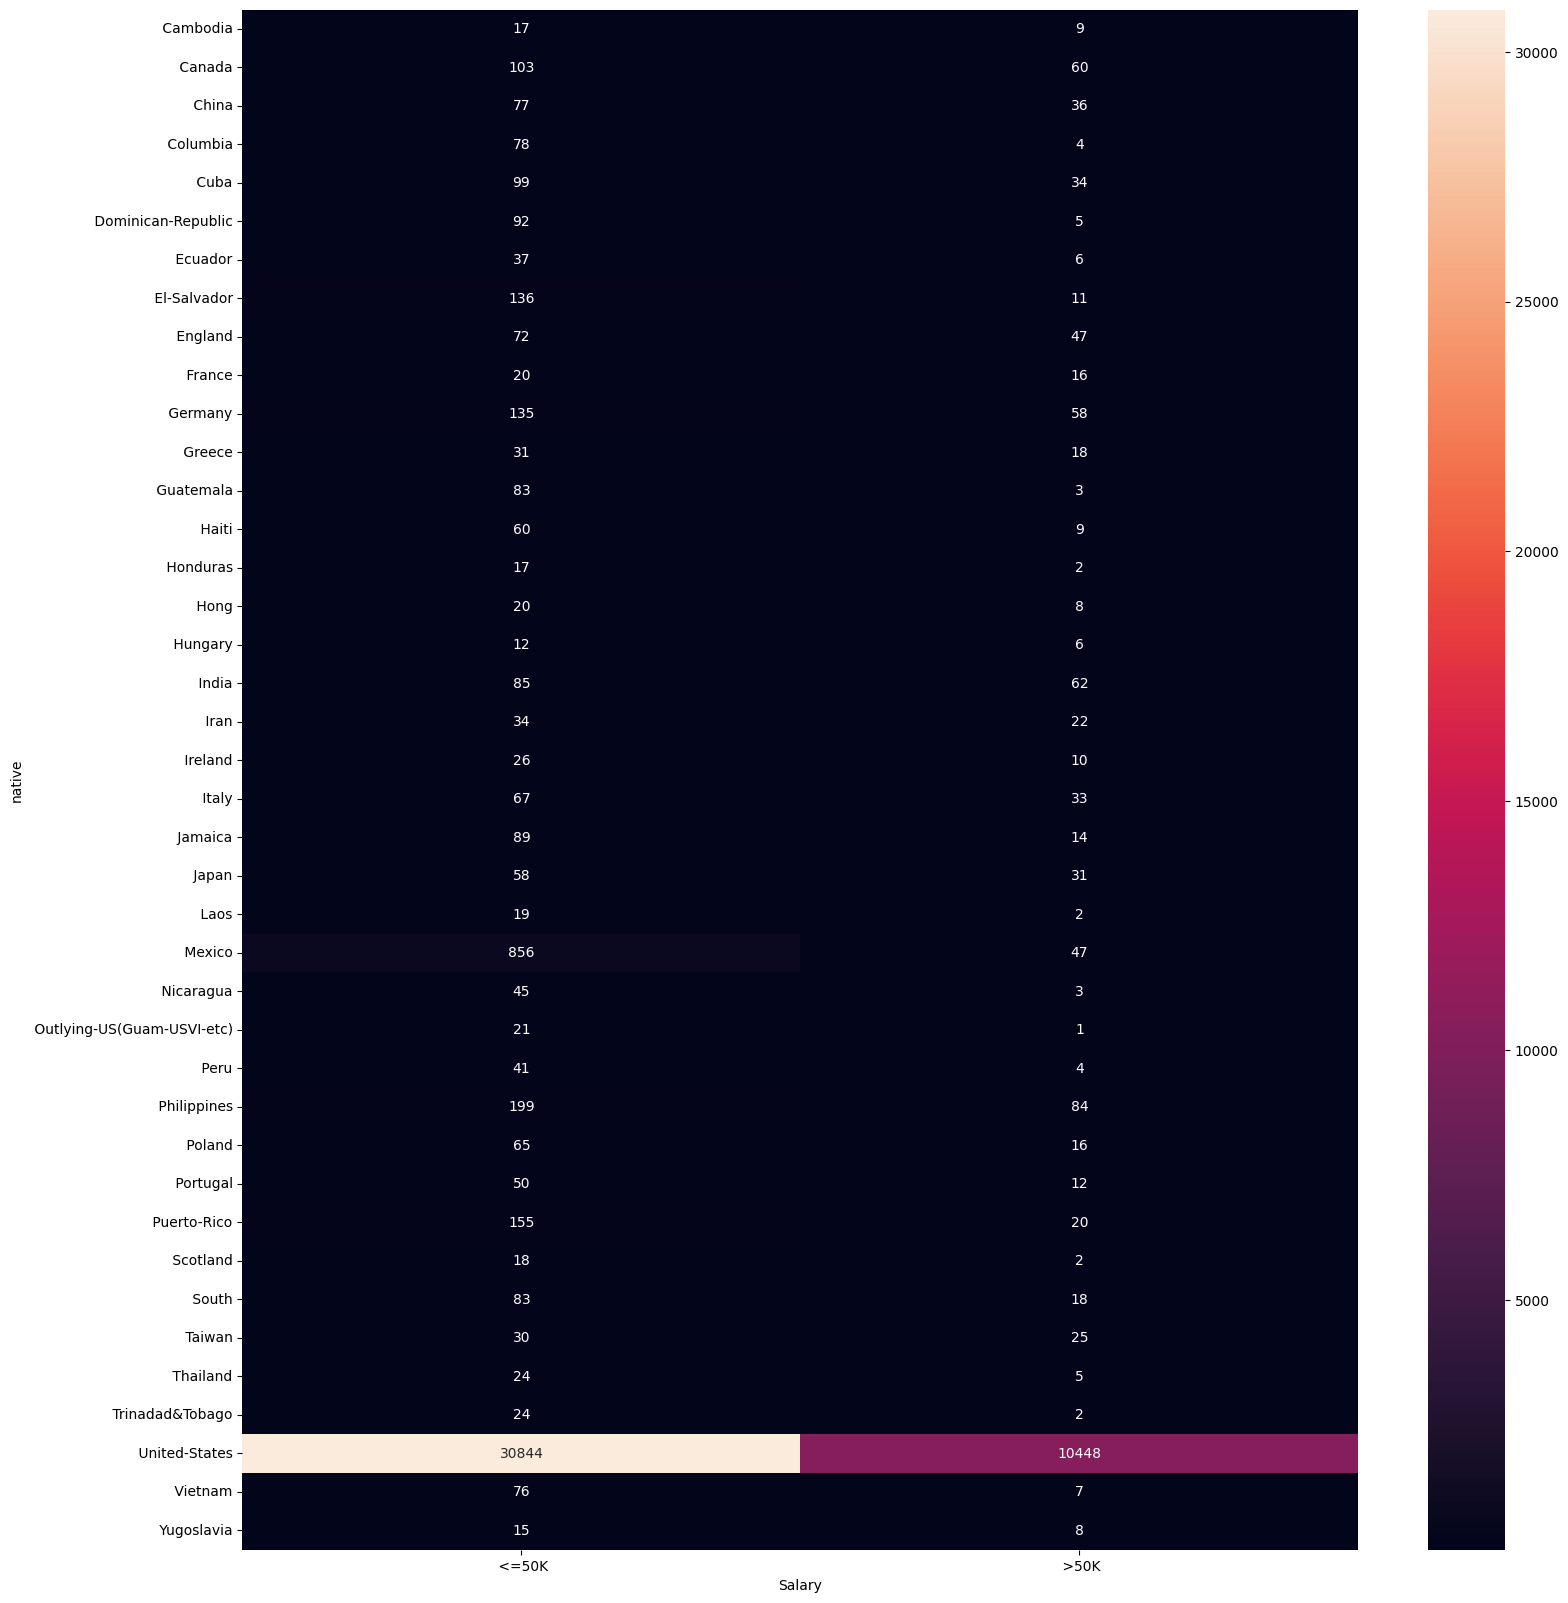

In [167]:
fig = plt.figure(figsize = (18,20))
sns.heatmap(pd.crosstab(index = raw_data['native'], columns = raw_data['Salary']), annot = True,
                    fmt = 'g')

## Analyzing relation by plotting continous features with the target feature

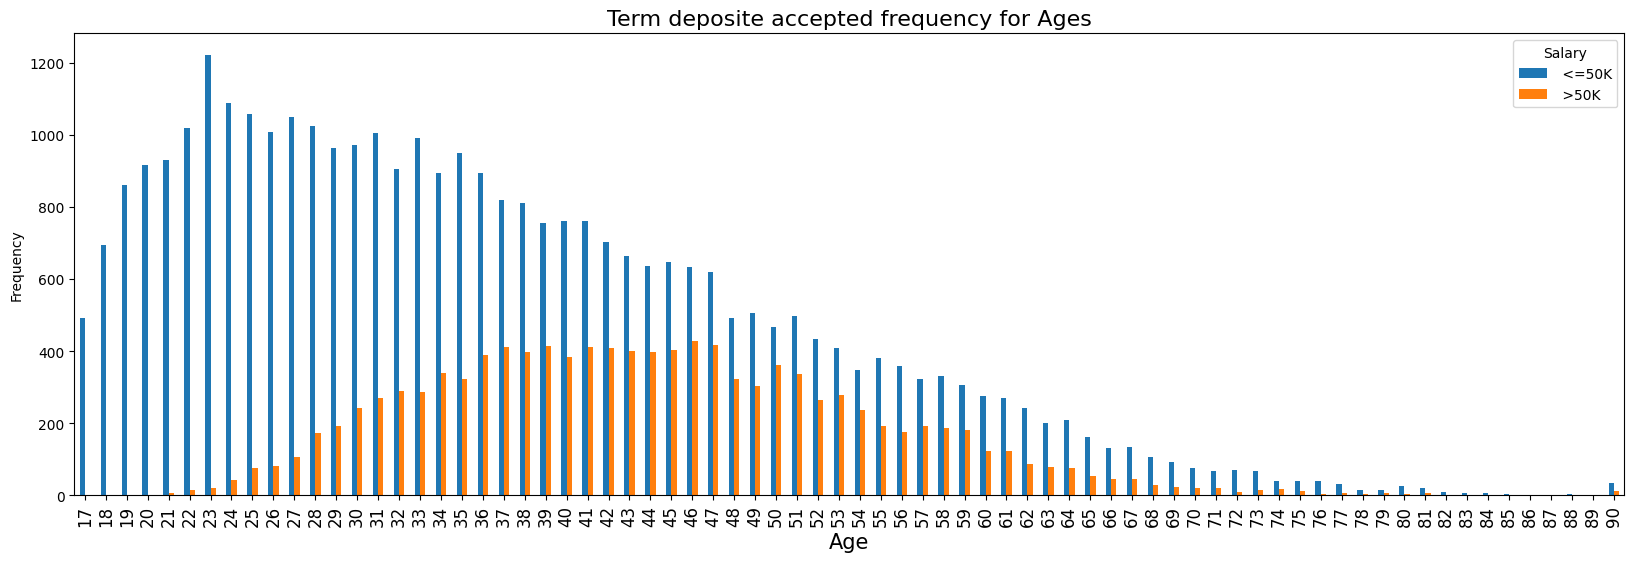

In [168]:
pd.crosstab(raw_data.age, raw_data.Salary).plot(kind = 'bar', figsize = (20,6))
plt.title('Term deposite accepted frequency for Ages', fontsize = 16)
plt.xticks(fontsize = 12)
plt.xlabel('Age', fontsize = 15)
plt.ylabel('Frequency')
plt.show()

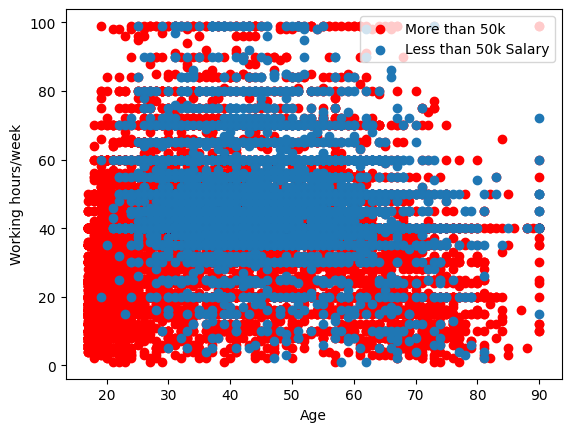

In [169]:
plt.scatter(x=raw_data.age[raw_data.Salary== ' <=50K'], y=raw_data.hoursperweek[(raw_data.Salary== ' <=50K')], c="red")
plt.scatter(x=raw_data.age[raw_data.Salary== ' >50K'], y=raw_data.hoursperweek[(raw_data.Salary== ' >50K')])
plt.legend(["More than 50k", "Less than 50k Salary"])
plt.xlabel("Age")
plt.ylabel("Working hours/week")
plt.show()

In [170]:
raw_data.age.value_counts()

age
36    1283
33    1279
31    1274
35    1272
23    1241
      ... 
88       5
85       5
86       1
89       1
87       1
Name: count, Length: 74, dtype: int64

## Visualize the salary and employee rate by age

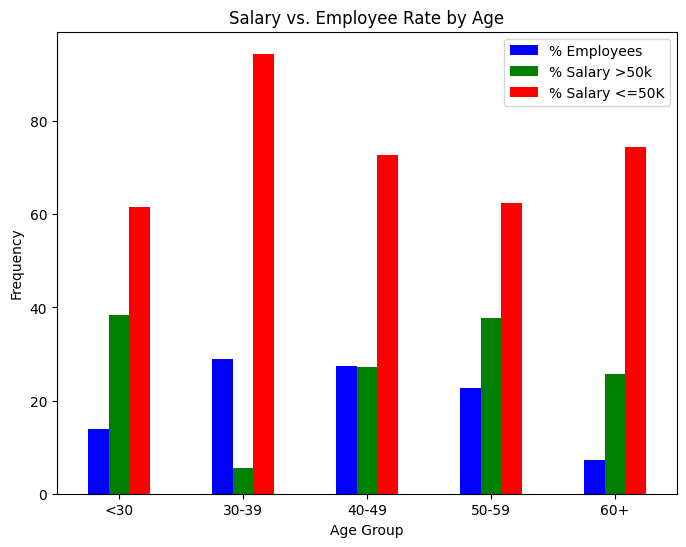

In [223]:
lst = [raw_data]
for column in lst:
    column.loc[column["age"] < 30,  'age_group'] = 20
    column.loc[(column["age"] >= 30) & (column["age"] <= 39), 'age_group'] = 30
    column.loc[(column["age"] >= 40) & (column["age"] <= 49), 'age_group'] = 40
    column.loc[(column["age"] >= 50) & (column["age"] <= 59), 'age_group'] = 50
    column.loc[column["age"] >= 60, 'age_group'] = 60

count_age_response_pct = pd.crosstab(raw_data['Salary'], raw_data['age_group']).apply(lambda x: x / x.sum() * 100)
count_age_response_pct = count_age_response_pct.transpose() 

age = pd.DataFrame(raw_data['age_group'].value_counts())
age['% Salary >50k'] = count_age_response_pct[' >50K']
age['% Salary <=50K'] = count_age_response_pct[' <=50K']
age.reset_index(inplace = True)
age['% Employees'] = age['count'] * 100 / age['count'].sum()
age.drop('age_group', axis=1, inplace=True)

age['age'] = [30, 40, 50, 20, 60]
age = age.sort_values('age', ascending=True)

plot_age = age[['% Employees', '% Salary >50k', '% Salary <=50K']].plot(kind='bar', figsize=(8, 6),
                                                                      color=('blue', 'green', 'red'))
plt.xlabel('Age Group')
plt.ylabel('Frequency')
plt.xticks(np.arange(5), ('<30', '30-39', '40-49', '50-59', '60+'), rotation='horizontal')
plt.title('Salary vs. Employee Rate by Age')
plt.show()


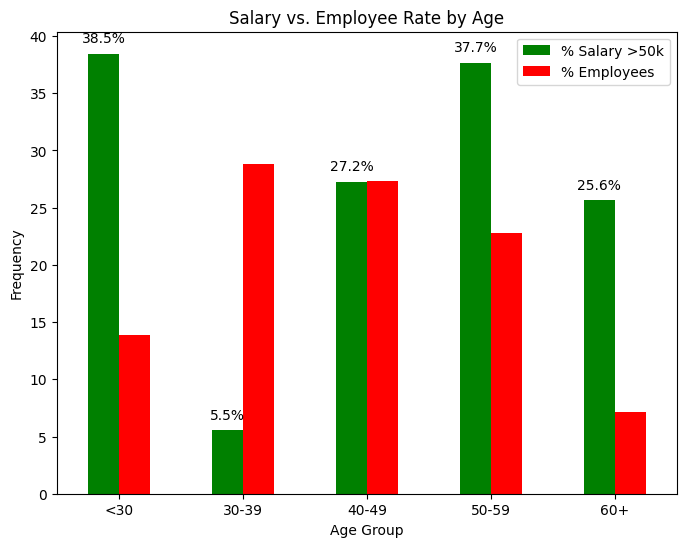

In [222]:
lst = [raw_data]
for column in lst:
    column.loc[column["age"] < 30,  'age_group'] = 20
    column.loc[(column["age"] >= 30) & (column["age"] <= 39), 'age_group'] = 30
    column.loc[(column["age"] >= 40) & (column["age"] <= 49), 'age_group'] = 40
    column.loc[(column["age"] >= 50) & (column["age"] <= 59), 'age_group'] = 50
    column.loc[column["age"] >= 60, 'age_group'] = 60
    
count_age_response_pct = pd.crosstab(raw_data['Salary'],raw_data['age_group']).apply(lambda x: x/x.sum() * 100)
count_age_response_pct = count_age_response_pct.transpose() 

age = pd.DataFrame(raw_data['age_group'].value_counts())
age['% Salary >50k'] = count_age_response_pct[' >50K']
age.reset_index(inplace = True)
age['% Employees'] = age['count']*100/age['count'].sum()
age.drop('age_group',axis = 1,inplace = True)

age['age'] = [30,40,50,20,60]
age = age.sort_values('age',ascending = True)

plot_age = age[['% Salary >50k','% Employees']].plot(kind = 'bar',
                                              figsize=(8,6), color = ('green','red'))
plt.xlabel('Age Group')
plt.ylabel('Frequency')
plt.xticks(np.arange(5), ('<30', '30-39', '40-49', '50-59', '60+'),rotation = 'horizontal')
plt.title('Salary vs. Employee Rate by Age')

# label the bar
for rec, label in zip(plot_age.patches,
                      age['% Salary >50k'].round(1).astype(str)):
    plot_age.text(rec.get_x() + rec.get_width()/2, 
                      rec.get_height() + 1, 
                      label+'%',  
                      ha = 'center', 
                      color = 'black')

## Visualize the Salary for >50K by working hours per week

In [213]:
raw_data.hoursperweek.describe()

count    45221.000000
mean        40.938038
std         12.007640
min          1.000000
25%         40.000000
50%         40.000000
75%         45.000000
max         99.000000
Name: hoursperweek, dtype: float64

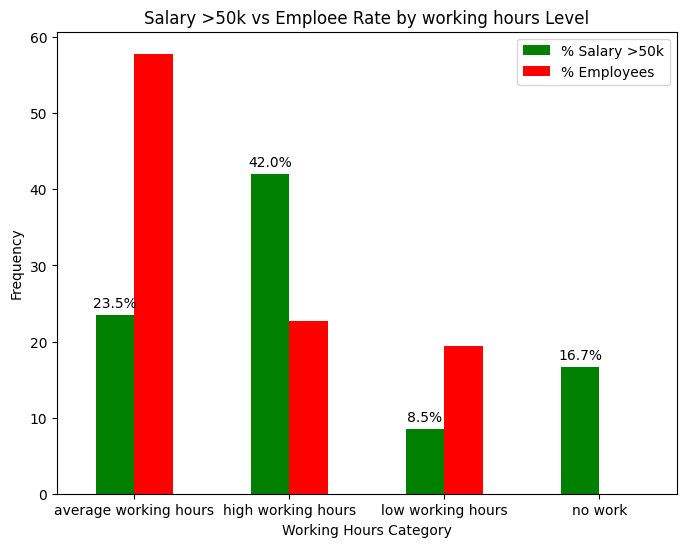

In [235]:
lst = [raw_data]
for column in lst:
    column.loc[column["hoursperweek"] <= 1,  'hour_group'] = 'no work'
    column.loc[(column["hoursperweek"] > 1) & (column["hoursperweek"] <= 35), 'hour_group'] = 'low working hours'
    column.loc[(column["hoursperweek"] > 35) & (column["hoursperweek"] <= 45), 'hour_group'] = 'average working hours'
    column.loc[(column["hoursperweek"] > 45), 'hour_group'] = 'high working hours'
    
count_balance_response_pct = pd.crosstab(raw_data['Salary'],raw_data['hour_group']).apply(lambda x: x/x.sum() * 100)
count_balance_response_pct = count_balance_response_pct.transpose()

bal = pd.DataFrame(raw_data['hour_group'].value_counts())
bal['% Salary >50k'] = count_balance_response_pct[' >50K']
bal.reset_index(inplace = True)
bal['% Employees'] = bal['count']*100/bal['count'].sum()
#bal.drop('hour_group',axis = 1,inplace = True)

#bal['bal'] = [1,2,0,3,5]
#bal = bal.sort_values('bal',ascending = True)

plot_balance = bal[['% Salary >50k','% Employees']].plot(kind = 'bar',
                                               color = ('green','red'),
                                               figsize = (8,6))

plt.title('Salary >50k vs Emploee Rate by working hours Level')
plt.ylabel('Frequency')
plt.xlabel('Working Hours Category')
plt.xticks(range(len(bal['hour_group'])), bal['hour_group'], rotation = 'horizontal')

# label the bar
for rec, label in zip(plot_balance.patches,
                      bal['% Salary >50k'].round(1).astype(str)):
    plot_balance.text(rec.get_x() + rec.get_width()/2, 
                      rec.get_height() + 1, 
                      label+'%',  
                      ha = 'center', 
                      color = 'black')

## Visualise the salary rate by workclass

In [236]:
count_job_response_pct = pd.crosstab(raw_data['Salary'],raw_data['workclass']).apply(lambda x: x/x.sum() * 100)
count_job_response_pct

workclass,Federal-gov,Local-gov,Private,Self-emp-inc,Self-emp-not-inc,State-gov,Without-pay
Salary,,,,,,,
<=50K,60.953058,70.483871,78.229148,44.592953,72.102213,73.27852,90.47619
>50K,39.046942,29.516129,21.770852,55.407047,27.897787,26.72148,9.52381


In [237]:
count_job_response_pct = count_job_response_pct.transpose()
count_job_response_pct

Salary,<=50K,>50K
workclass,,
Federal-gov,60.953058,39.046942
Local-gov,70.483871,29.516129
Private,78.229148,21.770852
Self-emp-inc,44.592953,55.407047
Self-emp-not-inc,72.102213,27.897787
State-gov,73.278520,26.721480
Without-pay,90.476190,9.523810


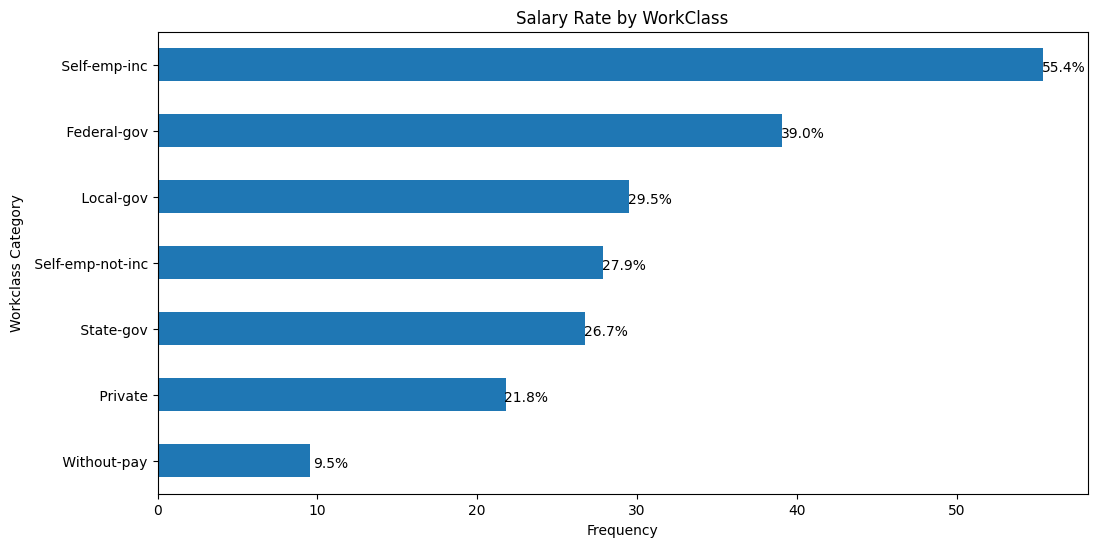

In [238]:
plot_job = count_job_response_pct[' >50K'].sort_values(ascending = True).plot(kind ='barh',
                                                                           figsize = (12,6))
                                                                               
plt.title('Salary Rate by WorkClass')
plt.xlabel('Frequency')
plt.ylabel('Workclass Category')

# Label each bar
for rec, label in zip(plot_job.patches,
                      count_job_response_pct[' >50K'].sort_values(ascending = True).round(1).astype(str)):
    plot_job.text(rec.get_width()+1.3, 
                  rec.get_y()+ rec.get_height()-0.4, 
                  label+'%', 
                  ha = 'center', 
                  va='bottom')

In [239]:
count_job_response_pct = pd.crosstab(raw_data['Salary'],raw_data['education']).apply(lambda x: x/x.sum() * 100)
count_job_response_pct

education,10th,11th,12th,1st-4th,5th-6th,7th-8th,9th,Assoc-acdm,Assoc-voc,Bachelors,Doctorate,HS-grad,Masters,Preschool,Prof-school,Some-college
Salary,,,,,,,,,,,,,,,,
<=50K,93.295176,94.502779,92.54766,96.396396,95.100223,93.317132,94.378698,73.589914,74.272588,58.018494,26.654412,83.656903,44.590294,98.611111,24.585987,79.894928
>50K,6.704824,5.497221,7.45234,3.603604,4.899777,6.682868,5.621302,26.410086,25.727412,41.981506,73.345588,16.343097,55.409706,1.388889,75.414013,20.105072


In [240]:
count_job_response_pct = count_job_response_pct.transpose()
count_job_response_pct

Salary,<=50K,>50K
education,,
10th,93.295176,6.704824
11th,94.502779,5.497221
12th,92.547660,7.452340
1st-4th,96.396396,3.603604
5th-6th,95.100223,4.899777
7th-8th,93.317132,6.682868
9th,94.378698,5.621302
Assoc-acdm,73.589914,26.410086
Assoc-voc,74.272588,25.727412


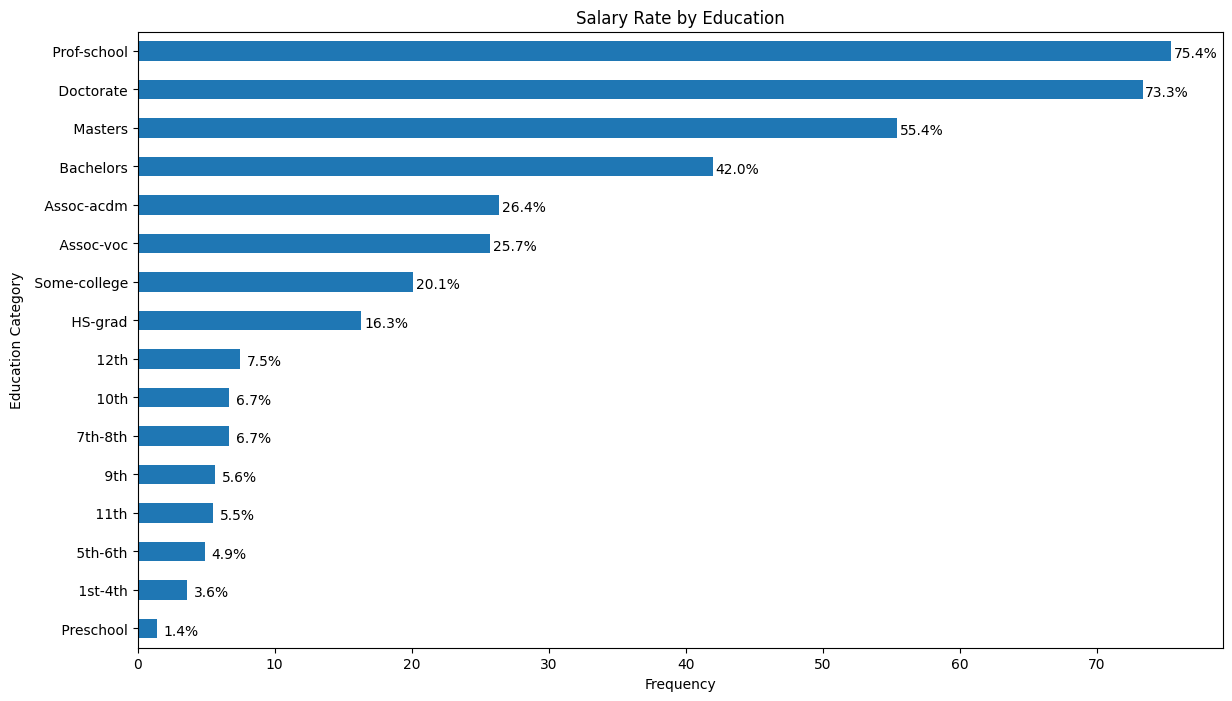

In [241]:
plot_job = count_job_response_pct[' >50K'].sort_values(ascending = True).plot(kind ='barh',
                                                                           figsize = (14,8))
                                                                               
plt.title('Salary Rate by Education')
plt.xlabel('Frequency')
plt.ylabel('Education Category')

# Label each bar
for rec, label in zip(plot_job.patches,
                      count_job_response_pct[' >50K'].sort_values(ascending = True).round(1).astype(str)):
    plot_job.text(rec.get_width()+1.8, 
                  rec.get_y()+ rec.get_height()-0.5, 
                  label+'%', 
                  ha = 'center', 
                  va='bottom')

# Pre-processing

In [243]:
raw_data.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary,age_group,hour_group
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,30.0,average working hours
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,50.0,low working hours
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,30.0,average working hours
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,50.0,average working hours
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,20.0,average working hours


In [244]:
raw_data.drop(['age_group','hour_group'], axis = 1 , inplace = True)

In [245]:
raw_data.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [246]:
data_ = raw_data.copy()
data_.drop('Salary', axis = 1, inplace = True)
data_ = pd.get_dummies(data_.iloc[:,:])
data_.head()

,age,educationno,capitalgain,capitalloss,hoursperweek,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,...,native_ Portugal,native_ Puerto-Rico,native_ Scotland,native_ South,native_ Taiwan,native_ Thailand,native_ Trinadad&Tobago,native_ United-States,native_ Vietnam,native_ Yugoslavia
0,39,13,2174,0,40,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,50,13,0,0,13,False,False,False,False,True,...,False,False,False,False,False,False,False,True,False,False
2,38,9,0,0,40,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
3,53,7,0,0,40,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
4,28,13,0,0,40,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False


In [247]:
data_['Salary'] = raw_data.Salary
data_.head()

,age,educationno,capitalgain,capitalloss,hoursperweek,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,...,native_ Puerto-Rico,native_ Scotland,native_ South,native_ Taiwan,native_ Thailand,native_ Trinadad&Tobago,native_ United-States,native_ Vietnam,native_ Yugoslavia,Salary
0,39,13,2174,0,40,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,<=50K
1,50,13,0,0,13,False,False,False,False,True,...,False,False,False,False,False,False,True,False,False,<=50K
2,38,9,0,0,40,False,False,True,False,False,...,False,False,False,False,False,False,True,False,False,<=50K
3,53,7,0,0,40,False,False,True,False,False,...,False,False,False,False,False,False,True,False,False,<=50K
4,28,13,0,0,40,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,<=50K


In [248]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [249]:
le = LabelEncoder()
le.fit(data_.Salary)
data_['Salary'] = le.transform(data_.Salary)
data_.head()

,age,educationno,capitalgain,capitalloss,hoursperweek,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,...,native_ Puerto-Rico,native_ Scotland,native_ South,native_ Taiwan,native_ Thailand,native_ Trinadad&Tobago,native_ United-States,native_ Vietnam,native_ Yugoslavia,Salary
0,39,13,2174,0,40,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,0
1,50,13,0,0,13,False,False,False,False,True,...,False,False,False,False,False,False,True,False,False,0
2,38,9,0,0,40,False,False,True,False,False,...,False,False,False,False,False,False,True,False,False,0
3,53,7,0,0,40,False,False,True,False,False,...,False,False,False,False,False,False,True,False,False,0
4,28,13,0,0,40,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,0


Okay, that is just too many columns! So, I'd rather go with label encoding for all the categorical variables instead of using dummy variabels.

In [252]:
print(categorical)

['workclass', 'education', 'maritalstatus', 'occupation', 'relationship', 'race', 'sex', 'native', 'Salary']


In [253]:
raw_data.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [254]:
df = raw_data.copy()
label_encoder = LabelEncoder()

for var in categorical:
    df[var] = label_encoder.fit_transform(df[var])

In [255]:
df.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,9,13,4,0,1,4,1,2174,0,40,37,0
1,50,4,9,13,2,3,0,4,1,0,0,13,37,0
2,38,2,11,9,0,5,1,4,1,0,0,40,37,0
3,53,2,1,7,2,5,0,2,1,0,0,40,37,0
4,28,2,9,13,2,9,5,2,0,0,0,40,4,0


In [256]:
x = df.drop('Salary', axis = 1)
y = df.Salary

In [257]:
y.unique()

array([0, 1])

In [258]:
from sklearn.model_selection import KFold, GridSearchCV, train_test_split, StratifiedKFold, RandomizedSearchCV

In [262]:
from collections import Counter

In [264]:
# create stratifiedKFold object

skf = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 1)

for train_ix, test_ix in skf.split(x, y):
    train_x, test_x = x.iloc[train_ix], x.iloc[test_ix]
    train_y, test_y = y.iloc[train_ix], y.iloc[test_ix]

counter_train = Counter(train_y)
counter_test = Counter(test_y)
print('Training Data', counter_train, 'Testing Data', counter_test)

Training Data Counter({0: 30612, 1: 10087}) Testing Data Counter({0: 3401, 1: 1121})


In [265]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 1, stratify = y)

In [267]:
counter_train = Counter(y_train)
counter_test = Counter(y_test)
print('Training Data', counter_train, 'Testing Data', counter_test)

Training Data Counter({0: 23809, 1: 7845}) Testing Data Counter({0: 10204, 1: 3363})


In [269]:
print('Shape of x_train: ', x_train.shape)
print('Shape of x_test: ', x_test.shape)
print('Shape of y_train: ', y_train.shape)
print('Shape of y_test: ', y_test.shape)

Shape of x_train:  (31654, 13)
Shape of x_test:  (13567, 13)
Shape of y_train:  (31654,)
Shape of y_test:  (13567,)


# Testing Naive Bayes models on the imbalanced data

In [271]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [280]:
def print_score(clf, x_train, y_train, x_test, y_test, train = True):
    if train:
        pred = clf.predict(x_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict = True))
        print('Train Results:\n===================================================')
        print(f'Accuracy score: {accuracy_score(y_train, pred)*100:.2f}%')
        print('---------------------------------------------------')
        print(f'Classification report:\n{clf_report}')
        print('---------------------------------------------------')
        print(f'Confusion Matrix: ]\n {confusion_matrix(y_train, pred)}\n')

    elif train == False:
        pred = clf.predict(x_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict = True))
        print('Train Results:\n===================================================')
        print(f'Accuracy score: {accuracy_score(y_test, pred)*100:.2f}%')
        print('---------------------------------------------------')
        print(f'Classification report:\n{clf_report}')
        print('---------------------------------------------------')
        print(f'Confusion Matrix: ]\n {confusion_matrix(y_test, pred)}\n')

In [281]:
from sklearn.naive_bayes import MultinomialNB

In [282]:
rf_clf = MultinomialNB()
rf_clf.fit(x_train, y_train)

print_score(rf_clf, x_train, y_train, x_test, y_test, train = True)
print_score(rf_clf, x_train, y_train, x_test, y_test, train = False)


Train Results:
Accuracy score: 77.41%
---------------------------------------------------
Classification report:
                      0            1  accuracy     macro avg  weighted avg
precision      0.787214     0.630984   0.77412      0.709099      0.748495
recall         0.958881     0.213384   0.77412      0.586133      0.774120
f1-score       0.864609     0.318918   0.77412      0.591763      0.729367
support    23809.000000  7845.000000   0.77412  31654.000000  31654.000000
---------------------------------------------------
Confusion Matrix: ]
 [[22830   979]
 [ 6171  1674]]

Train Results:
Accuracy score: 77.24%
---------------------------------------------------
Classification report:
                      0            1  accuracy     macro avg  weighted avg
precision      0.786013     0.622005  0.772389      0.704009      0.745359
recall         0.958252     0.208445  0.772389      0.583348      0.772389
f1-score       0.863628     0.312249  0.772389      0.587939      0.7

In [283]:
from sklearn.naive_bayes import GaussianNB

In [284]:
rf_clf = GaussianNB()
rf_clf.fit(x_train, y_train)

print_score(rf_clf, x_train, y_train, x_test, y_test, train = True)
print_score(rf_clf, x_train, y_train, x_test, y_test, train = False)

Train Results:
Accuracy score: 79.53%
---------------------------------------------------
Classification report:
                      0            1  accuracy     macro avg  weighted avg
precision      0.810939     0.679947  0.795255      0.745443      0.778474
recall         0.949053     0.328489  0.795255      0.638771      0.795255
f1-score       0.874577     0.442974  0.795255      0.658775      0.767610
support    23809.000000  7845.000000  0.795255  31654.000000  31654.000000
---------------------------------------------------
Confusion Matrix: ]
 [[22596  1213]
 [ 5268  2577]]

Train Results:
Accuracy score: 79.51%
---------------------------------------------------
Classification report:
                      0            1  accuracy     macro avg  weighted avg
precision      0.810264     0.681847  0.795091      0.746055      0.778432
recall         0.950020     0.325007  0.795091      0.637514      0.795091
f1-score       0.874594     0.440193  0.795091      0.657394      0.7

In [285]:
from sklearn.naive_bayes import CategoricalNB

In [286]:
rf_clf = CategoricalNB()
rf_clf.fit(x_train, y_train)

print_score(rf_clf, x_train, y_train, x_test, y_test, train = True)
print_score(rf_clf, x_train, y_train, x_test, y_test, train = False)

Train Results:
Accuracy score: 85.70%
---------------------------------------------------
Classification report:
                      0            1  accuracy     macro avg  weighted avg
precision      0.890830     0.737475  0.856985      0.814153      0.852823
recall         0.922970     0.656724  0.856985      0.789847      0.856985
f1-score       0.906616     0.694761  0.856985      0.800688      0.854110
support    23809.000000  7845.000000  0.856985  31654.000000  31654.000000
---------------------------------------------------
Confusion Matrix: ]
 [[21975  1834]
 [ 2693  5152]]

Train Results:
Accuracy score: 85.77%
---------------------------------------------------
Classification report:
                      0            1  accuracy     macro avg  weighted avg
precision      0.890789     0.740107  0.857669      0.815448      0.853438
recall         0.924049     0.656259  0.857669      0.790154      0.857669
f1-score       0.907114     0.695666  0.857669      0.801390      0.8

__Conclusion:__

1. Of all three naive bayes algorithms, categoricalNB is performing better than the other two. So, we are going to use that for our final modeling.

2. Becuause out data is imbalanced, cause there is more 0's than 1's in the target dataset, so we might wanna do something about it. Maybe we could use SMOTE function to balance it out and then use our model on it.

So, let's try that out!

# SMOTE technique

## SMOTE oversampling technique

In [287]:
from imblearn.over_sampling import SMOTE

In [288]:
counter = Counter(y_train)
print('Before: ', counter)

smt = SMOTE()
x_train_sm, y_train_sm = smt.fit_resample(x_train, y_train)

counter = Counter(y_train_sm)
print('After: ', counter)

Before:  Counter({0: 23809, 1: 7845})
After:  Counter({1: 23809, 0: 23809})


## ADASYN: adaptive synthetic sampling approach

In [289]:
from imblearn.over_sampling import ADASYN

In [292]:
counter = Counter(y_train)
print('Before: ', counter)

smt = ADASYN()
x_train_ada, y_train_ada = smt.fit_resample(x_train, y_train)

counter = Counter(y_train_ada)
print('After: ', counter)

Before:  Counter({0: 23809, 1: 7845})
After:  Counter({0: 23809, 1: 22681})


## Hybridization: SMOTE + Tomek Links

In [290]:
from imblearn.combine import SMOTETomek

In [293]:
counter = Counter(y_train)
print('Before: ', counter)

smt = SMOTETomek(random_state = 34)
x_train_smtom, y_train_smtom = smt.fit_resample(x_train, y_train)

counter = Counter(y_train_smtom)
print('After: ', counter)

Before:  Counter({0: 23809, 1: 7845})
After:  Counter({1: 23379, 0: 23379})


## Hybridization: SMOTE + ENN

In [291]:
from imblearn.combine import SMOTEENN

In [294]:
counter = Counter(y_train)
print('Before: ', counter)

smt = SMOTEENN()
x_train_smenn, y_train_smenn = smt.fit_resample(x_train, y_train)

counter = Counter(y_train_smenn)
print('After: ', counter)

Before:  Counter({0: 23809, 1: 7845})
After:  Counter({1: 17320, 0: 16365})


## Performance Analysis after resampling

In [295]:
sampled_data = {
    'Actual': [x_train, y_train],
    'SMOTE': [x_train_sm, y_train_sm],
    'ADASYN': [x_train_ada, y_train_ada],
    'SMOTE_TOMEK': [x_train_smtom, y_train_smtom],
    'SMOMTE-ENN': [x_train_smenn, y_train_smenn]
}    

In [300]:
from sklearn.metrics import roc_curve, roc_auc_score, recall_score, precision_score, f1_score

In [299]:
def test_eval(clf_model, x_test, y_test, algo = None, sampling = None):

    y_prob = clf_model.predict_proba(x_test)
    y_pred = clf_model.predict(x_test)

    print('Confusion Matrix')
    print('='*60)
    print(confusion_matrix(y_test, y_pred), '\n')
    print('Classification Report')
    print('='*60)
    print(classification_report(y_test, y_pred), '\n')
    print('AUC-ROC')
    print('='*60)
    print(roc_auc_score(y_test, y_prob[:,1]))

    f1 = f1_score(y_test, y_pred, average = 'binary')
    recall = recall_score(y_test, y_pred, average = 'binary')
    precision = precision_score(y_test, y_pred, average = 'binary')

    return algo, precision, recall, f1, sampling

In [301]:
model_params = {
    'Gaussian-Naive-Bayes' : {
        'model' : GaussianNB(),
        'params': {'var_smoothing' : np.logspace(0, -9, num = 100)}
    }
}

In [302]:
from sklearn.model_selection import RepeatedStratifiedKFold

In [308]:
cv = RepeatedStratifiedKFold(n_splits = 5, 
                             n_repeats = 3, 
                             random_state = 999)

output = []
for model, model_hp in model_params.items():
    for resam, data in sampled_data.items():
        clf = RandomizedSearchCV(model_hp['model'], model_hp['params'], cv = cv, scoring = 'f1_weighted', n_jobs = -1)
        clf.fit(data[0], data[1])
        clf_best = clf.best_estimator_
        print('x'*60)
        print(model+ ' with ' + resam)
        print('='*60)
        output.append(test_eval(clf_best, x_test, y_test, model, resam))
        print('\n\n')

xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
Gaussian-Naive-Bayes with Actual
Confusion Matrix
[[9692  512]
 [2289 1074]] 

Classification Report
              precision    recall  f1-score   support

           0       0.81      0.95      0.87     10204
           1       0.68      0.32      0.43      3363

    accuracy                           0.79     13567
   macro avg       0.74      0.63      0.65     13567
weighted avg       0.78      0.79      0.76     13567
 

AUC-ROC
0.8564836362877641



xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
Gaussian-Naive-Bayes with SMOTE
Confusion Matrix
[[9595  609]
 [2075 1288]] 

Classification Report
              precision    recall  f1-score   support

           0       0.82      0.94      0.88     10204
           1       0.68      0.38      0.49      3363

    accuracy                           0.80     13567
   macro avg       0.75      0.66      0.68     13567
weighted avg       0.79      0.80      0.78   

In [345]:
from scipy.stats import uniform

In [348]:
model_params1 = {
    'Categorical-Naive-Bayes' : {
        'model' : CategoricalNB(),
        'params': {'alpha' : uniform(0.01, 9),
                  'fit_prior': [True, False]}
    }
}

In [349]:
cv = RepeatedStratifiedKFold(n_splits = 5, 
                             n_repeats = 3, 
                             random_state = 999)

output = []
for model, model_hp in model_params1.items():
    for resam, data in sampled_data.items():
        clf = RandomizedSearchCV(model_hp['model'], model_hp['params'], cv = cv, scoring = 'f1_weighted', n_jobs = -1)
        clf.fit(data[0], data[1])
        clf_best = clf.best_estimator_
        print('x'*60)
        print(model+ ' with ' + resam)
        print('='*60)
        output.append(test_eval(clf_best, x_test, y_test, model, resam))
        print('\n\n')

xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
Categorical-Naive-Bayes with Actual
Confusion Matrix
[[8934 1270]
 [ 826 2537]] 

Classification Report
              precision    recall  f1-score   support

           0       0.92      0.88      0.90     10204
           1       0.67      0.75      0.71      3363

    accuracy                           0.85     13567
   macro avg       0.79      0.81      0.80     13567
weighted avg       0.85      0.85      0.85     13567
 

AUC-ROC
0.9138726535325218



xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
Categorical-Naive-Bayes with SMOTE
Confusion Matrix
[[8080 2124]
 [ 459 2904]] 

Classification Report
              precision    recall  f1-score   support

           0       0.95      0.79      0.86     10204
           1       0.58      0.86      0.69      3363

    accuracy                           0.81     13567
   macro avg       0.76      0.83      0.78     13567
weighted avg       0.85      0.81      0

# Final model and evaluation

__Conclusion:__
we had better result with the original data and while using CategoricalNB

In [350]:
param_dist = {
    'alpha': uniform(0.01, 9),  
    'fit_prior': [True, False],
}

categorical_nb = CategoricalNB()

# Create RandomizedSearchCV
random_search = RandomizedSearchCV(categorical_nb, param_distributions=param_dist, n_iter=10, cv=5, random_state=42)

# Fit the model on the training data
random_search.fit(x_train, y_train)

# Print the best hyperparameters
print("Best Hyperparameters:", random_search.best_params_)

Best Hyperparameters: {'alpha': 3.3808610696262624, 'fit_prior': True}


In [353]:
y_pred = random_search.predict(x_test)
print('Accuracy: ', accuracy_score(y_test, y_pred))

Accuracy:  0.8543524729122135


In [354]:
print('Classification Report')
print(classification_report(y_test, y_pred))

Classification Report
              precision    recall  f1-score   support

           0       0.88      0.94      0.91     10204
           1       0.76      0.60      0.67      3363

    accuracy                           0.85     13567
   macro avg       0.82      0.77      0.79     13567
weighted avg       0.85      0.85      0.85     13567



In [355]:
print('Confusion Matrix')
print(confusion_matrix(y_test, y_pred))

Confusion Matrix
[[9584  620]
 [1356 2007]]


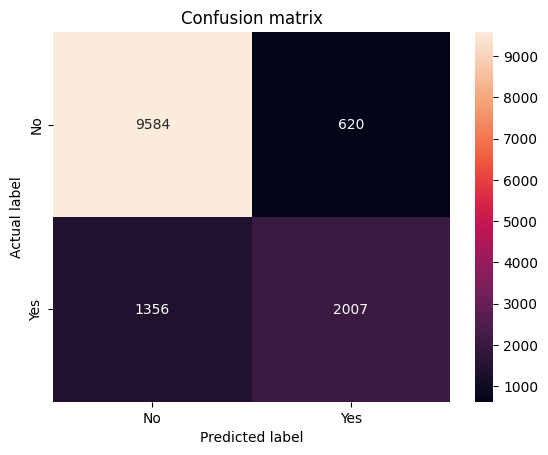

In [357]:
cm = confusion_matrix(y_test, y_pred)
class_label = ['No','Yes']
df_cm = pd.DataFrame(cm, index = class_label, columns = class_label)
sns.heatmap(df_cm, annot = True, fmt = 'd')
plt.title('Confusion matrix')
plt.xlabel('Predicted label')
plt.ylabel('Actual label')
plt.show()

In [358]:
f1 = f1_score(y_test, y_pred, average = 'binary')
recall = recall_score(y_test, y_pred, average = 'binary')
precision = precision_score(y_test, y_pred, average = 'binary')

In [359]:
print('f1 score:', f1)

f1 score: 0.6701168614357262


In [360]:
print('recall: ', recall)

recall:  0.5967885816235504


In [361]:
print('precision: ', precision)

precision:  0.7639893414541302
